DATA CLEANING AND HANDLING MISSING DATA......

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Lead Scoring 1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

FILLING LAST ACTIVITY AND LAST NOTABLE ACTIIVTY

Missing values before filling: 103
Missing values after filling: 0


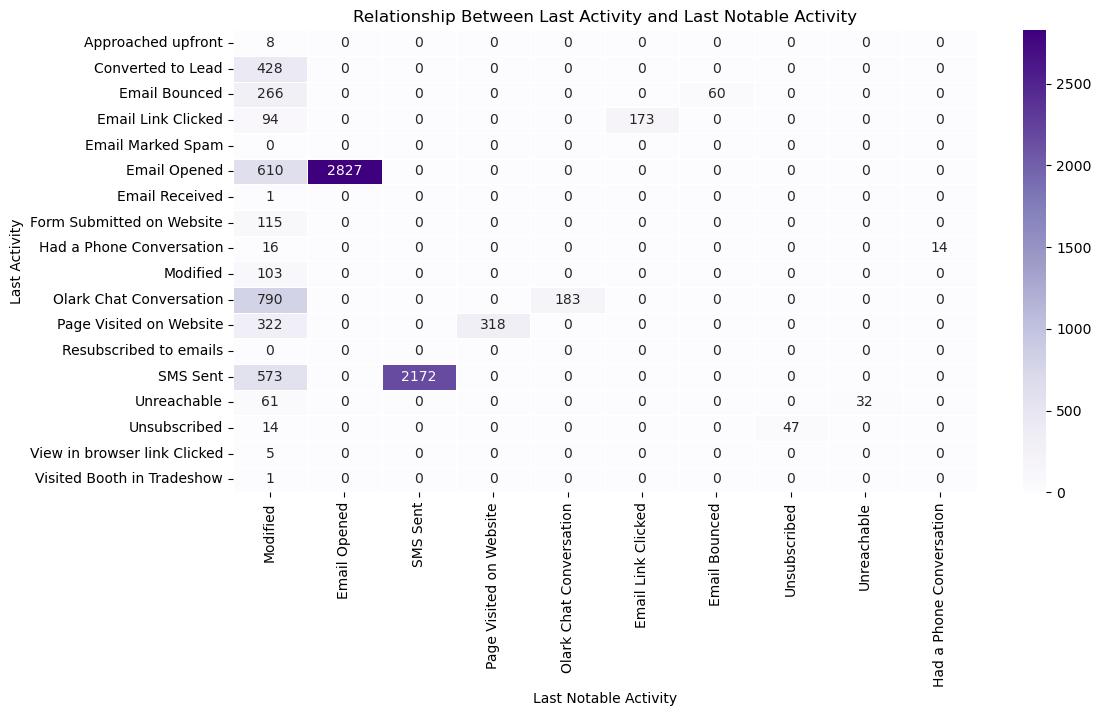

In [4]:
# import pandas as pd
import matplotlib.pyplot as plt

# Check missing values in "Last Activity"
print("Missing values before filling:", df["Last Activity"].isna().sum())

# Fill missing "Last Activity" with corresponding "Last Notable Activity"
df.loc[df["Last Activity"].isna(), "Last Activity"] = df["Last Notable Activity"]

# Fill any remaining missing values with the most common activity
most_common_activity = df["Last Activity"].mode()[0]
df["Last Activity"].fillna(most_common_activity, inplace=True)

# Check missing values after filling
print("Missing values after filling:", df["Last Activity"].isna().sum())

# Visualize the relationship between "Last Activity" and "Last Notable Activity"
plt.figure(figsize=(12, 6))
activity_pivot = df.pivot_table(index="Last Activity", columns="Last Notable Activity", aggfunc="size", fill_value=0)
top_activities = activity_pivot.loc[:, activity_pivot.sum(axis=0).nlargest(10).index]
sns.heatmap(top_activities, annot=True, cmap="Purples", fmt="d", linewidths=0.5)
plt.xlabel("Last Notable Activity")
plt.ylabel("Last Activity")
plt.title("Relationship Between Last Activity and Last Notable Activity")
plt.show()

Missing values before filling:
Country    2461
City       1420
dtype: int64
Missing values after filling:
Country    0
City       0
dtype: int64


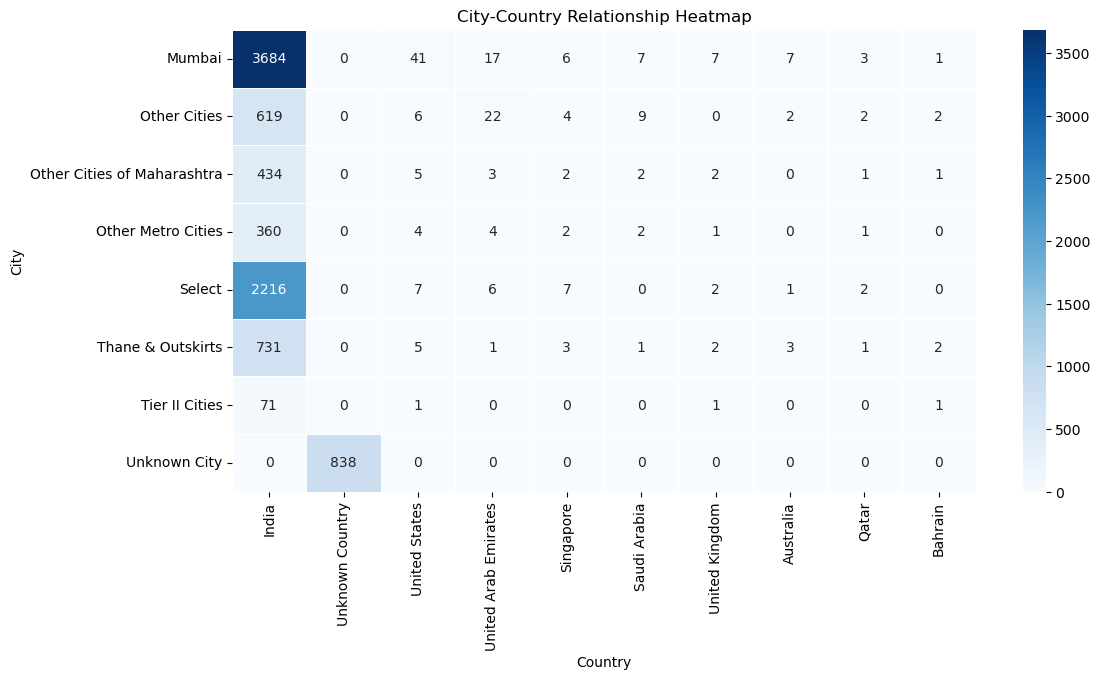

In [5]:
# Step 1: Create mappings from dataset
city_to_country = df.groupby("City")["Country"].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()
country_to_city = df.groupby("Country")["City"].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

# Print missing values before filling
print("Missing values before filling:")
print(df[["Country", "City"]].isna().sum())

# Step 2: Fill missing Country based on City
df["Country"] = df.apply(lambda row: city_to_country.get(row["City"], row["Country"]) if pd.isna(row["Country"]) else row["Country"], axis=1)

# Step 3: Fill missing City based on Country
df["City"] = df.apply(lambda row: country_to_city.get(row["Country"], row["City"]) if pd.isna(row["City"]) else row["City"], axis=1)

# Step 4: Replace any remaining NaNs with "Unknown City" and "Unknown Country"
df["City"].fillna("Unknown City", inplace=True)
df["Country"].fillna("Unknown Country", inplace=True)

# Print missing values after filling
print("Missing values after filling:")
print(df[["Country", "City"]].isna().sum())

# Step 5: Heatmap for City-Country relationships
plt.figure(figsize=(12, 6))
city_country_pivot = df.pivot_table(index="City", columns="Country", aggfunc="size", fill_value=0)

# Select top 10 most common City-Country pairs
top_city_country = city_country_pivot.loc[:, city_country_pivot.sum(axis=0).nlargest(10).index]

sns.heatmap(top_city_country, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.xlabel("Country")
plt.ylabel("City")
plt.title("City-Country Relationship Heatmap")
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# To fill null values in TotalVisits and Page Views Per Visit

# Step 1: Calculate the mean for converted leads
mean_total_visits_converted = df[df['Converted'] == 1]['TotalVisits'].mean()
mean_page_views_converted = df[df['Converted'] == 1]['Page Views Per Visit'].mean()

# Step 2: Calculate the mean for not converted leads
mean_total_visits_not_converted = df[df['Converted'] == 0]['TotalVisits'].mean()
mean_page_views_not_converted = df[df['Converted'] == 0]['Page Views Per Visit'].mean()

# Step 3: Fill null values in TotalVisits and Page Views Per Visit
df.loc[(df['Converted'] == 1) & (df['TotalVisits'].isnull()), 'TotalVisits'] = mean_total_visits_converted
df.loc[(df['Converted'] == 1) & (df['Page Views Per Visit'].isnull()), 'Page Views Per Visit'] = mean_page_views_converted

df.loc[(df['Converted'] == 0) & (df['TotalVisits'].isnull()), 'TotalVisits'] = mean_total_visits_not_converted
df.loc[(df['Converted'] == 0) & (df['Page Views Per Visit'].isnull()), 'Page Views Per Visit'] = mean_page_views_not_converted

# Optional: Check if there are any remaining null values
print("Remaining null values in TotalVisits:", df['TotalVisits'].isnull().sum())
print("Remaining null values in Page Views Per Visit:", df['Page Views Per Visit'].isnull().sum())

Remaining null values in TotalVisits: 0
Remaining null values in Page Views Per Visit: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [9]:
df['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [10]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

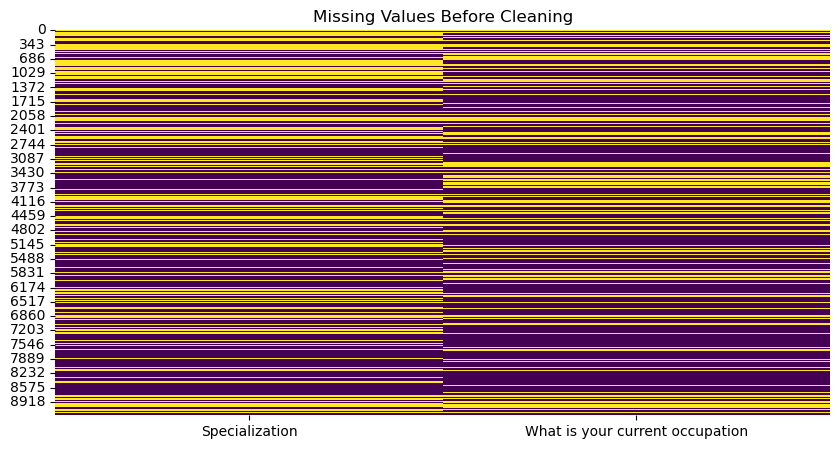


Most Common Specialization for each Occupation:
 What is your current occupation
Businessman             Marketing Management
Housewife                 Finance Management
Other                   Marketing Management
Student                   Finance Management
Unemployed                Finance Management
Working Professional    Marketing Management
Name: Specialization, dtype: object


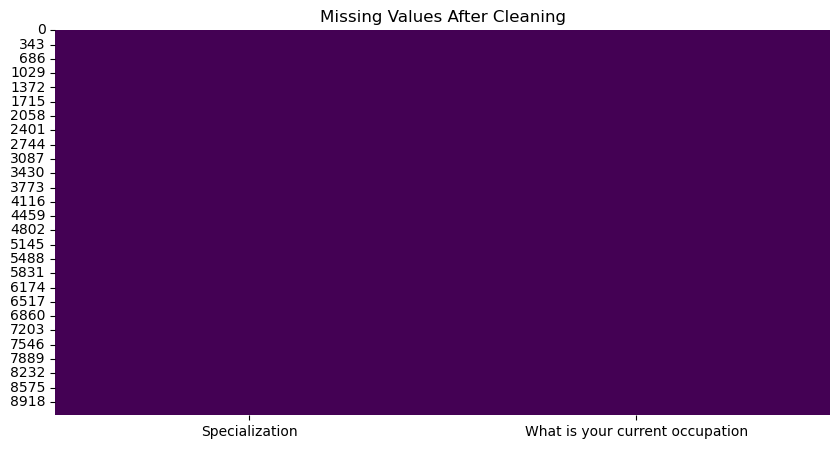

Specialization                     0
What is your current occupation    0
dtype: int64


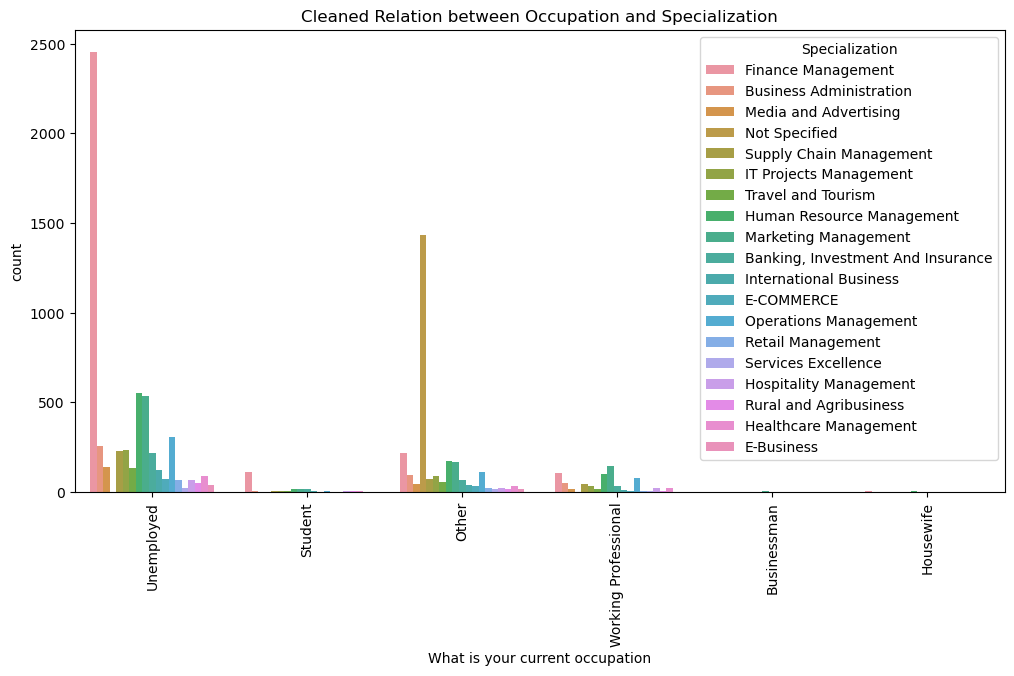

In [11]:
# Step 1: Replace "Select" in Specialization with NaN (since it's not a real category)
df["Specialization"] = df["Specialization"].replace("Select", np.nan)

# Step 2: Visualize missing values before cleaning
plt.figure(figsize=(10, 5))
sns.heatmap(df[["Specialization", "What is your current occupation"]].isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Before Cleaning")
plt.show()

# Step 3: Find common Specializations for each Occupation
specialization_counts = df.groupby("What is your current occupation")["Specialization"].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
print("\nMost Common Specialization for each Occupation:\n", specialization_counts)

# Step 4: Fill missing Specialization based on Occupation dynamically
df["Specialization"] = df.apply(
    lambda row: specialization_counts[row["What is your current occupation"]]
    if pd.isna(row["Specialization"]) and row["What is your current occupation"] in specialization_counts.index
    else row["Specialization"],
    axis=1
)

# Step 5: Fill remaining missing Specialization values with "Not Specified"
df["Specialization"].fillna("Not Specified", inplace=True)

# Step 6: Fill missing Occupation with "Other"
df["What is your current occupation"].fillna("Other", inplace=True)

# Step 7: Visualize missing values after cleaning
plt.figure(figsize=(10, 5))
sns.heatmap(df[["Specialization", "What is your current occupation"]].isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values After Cleaning")
plt.show()

# Step 8: Check the final count of missing values
print(df[["Specialization", "What is your current occupation"]].isnull().sum())

# Step 9: Check final distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="What is your current occupation", hue="Specialization")
plt.xticks(rotation=90)
plt.title("Cleaned Relation between Occupation and Specialization")
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [13]:
import pandas as pd

# Step 1: Drop Unwanted Columns
df.drop(columns=[
    "How did you hear about X Education", "Lead Profile",
    "Do Not Call", "Do Not Email", "Search", "Magazine", "Newspaper Article",
    "X Education Forums", "Newspaper", "Digital Advertisement",
    "Through Recommendations", "Receive More Updates About Our Courses"
], inplace=True)


def fill_with_mode(series):
    mode_val = series.mode()
    return series.fillna(mode_val[0] if not mode_val.empty else "Not Specified")

## 1. Fill `Tags` based on `Converted`
df["Tags"] = df.groupby("Converted")["Tags"].transform(fill_with_mode)

## 2. Fill `Lead Quality` based on `Converted`
df["Lead Quality"] = df.groupby("Converted")["Lead Quality"].transform(fill_with_mode)

## 3. Fill `What matters most to you in choosing a course` with mode
df["What matters most to you in choosing a course"] = fill_with_mode(df["What matters most to you in choosing a course"])

# Step 3: Check Missing Values After Cleaning
print("\nMissing Values After Cleaning:\n", df.isnull().sum())



Missing Values After Cleaning:
 Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Tags                                                0
Lead Quality                                        0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
City                                             

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [15]:
# Step 1: Drop Unwanted Columns
df.drop(columns=[ "Asymmetrique Activity Index" ,
"Asymmetrique Profile Index",  
"Asymmetrique Activity Score" ,
"Asymmetrique Profile Score"
], inplace=True)

In [16]:
df["Lead Source"].isnull().sum()

36

In [17]:
df["Lead Source"].fillna("Other Sources",inplace=True)

In [18]:
print(df["Lead Source"].isnull().sum())

0


In [19]:
df.to_csv("Lead_Scoring_cleaned_data.csv", index=False)

CLEANED DATA IS STORED IN LEAD_SCORING_CLEANED_DATA FILE 

EXPLORATORY DATA ANALYSIS - VISUALIZATIONS

In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=pd.read_csv('Lead_Scoring_cleaned_data.csv')

In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

HYPOTHESIS FOR LEAD ORIGIN

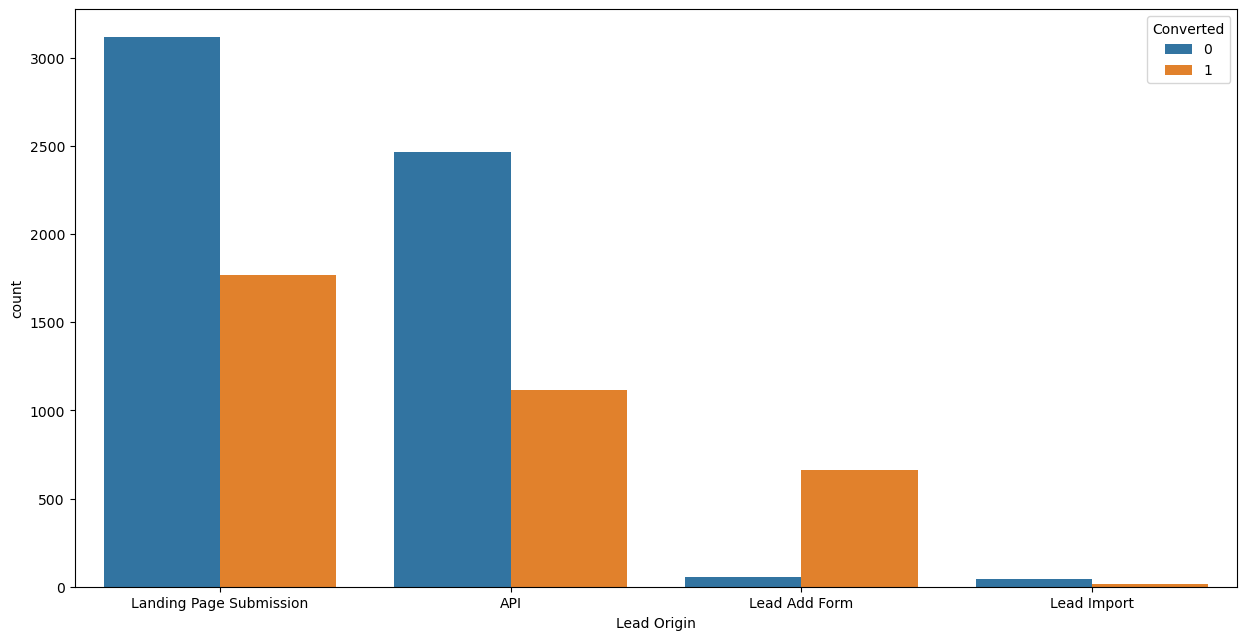

In [23]:
data['Lead Origin'].value_counts()

data.drop(data.index[data['Lead Origin'] == 'Quick Add Form'], inplace=True)

fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = data, order = data['Lead Origin'].value_counts().index)
plt.show()


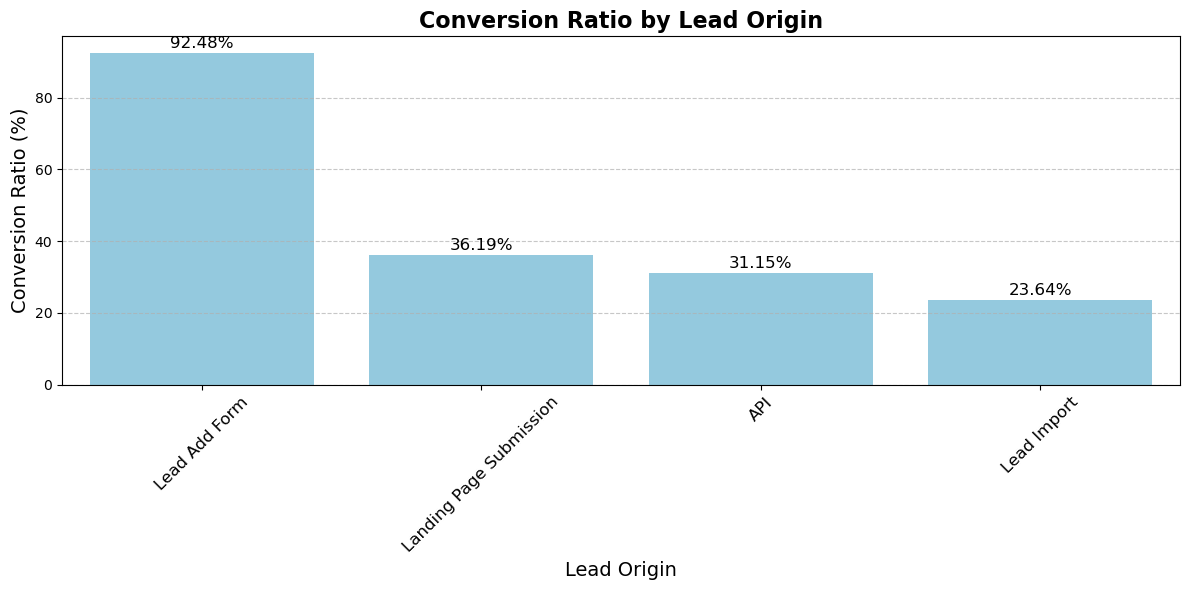

In [24]:
d = {}
for val in data['Lead Origin'].unique():
    converted_sum = data[data['Lead Origin'] == val]['Converted'].sum()
    total_leads = data[data['Lead Origin'] == val]['Converted'].count()
    not_converted = total_leads - converted_sum
    d[val] = [total_leads,converted_sum, not_converted, round(converted_sum / total_leads * 100, 2)]
df = pd.DataFrame.from_dict(d, orient='index').rename(
    columns={0: 'Leads', 1: 'Converted', 2: 'Not Converted', 3: 'Conversion Ratio'}
).sort_values(by=['Conversion Ratio'], ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(
    x=df.index, 
    y='Conversion Ratio', 
    data=df, 
    color='skyblue',  
    order=df.index 
)


plt.title('Conversion Ratio by Lead Origin', fontsize=16, fontweight='bold')
plt.xlabel('Lead Origin', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)

plt.xticks(rotation=45, fontsize=12)

for index, value in enumerate(df['Conversion Ratio']):
    plt.text(
        index,  
        value + 0.5,   
        f'{value}%', 
        ha='center',  
        va='bottom',
        fontsize=12
    )


plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

HYPOTHESIS FOR LEAD SOURCE

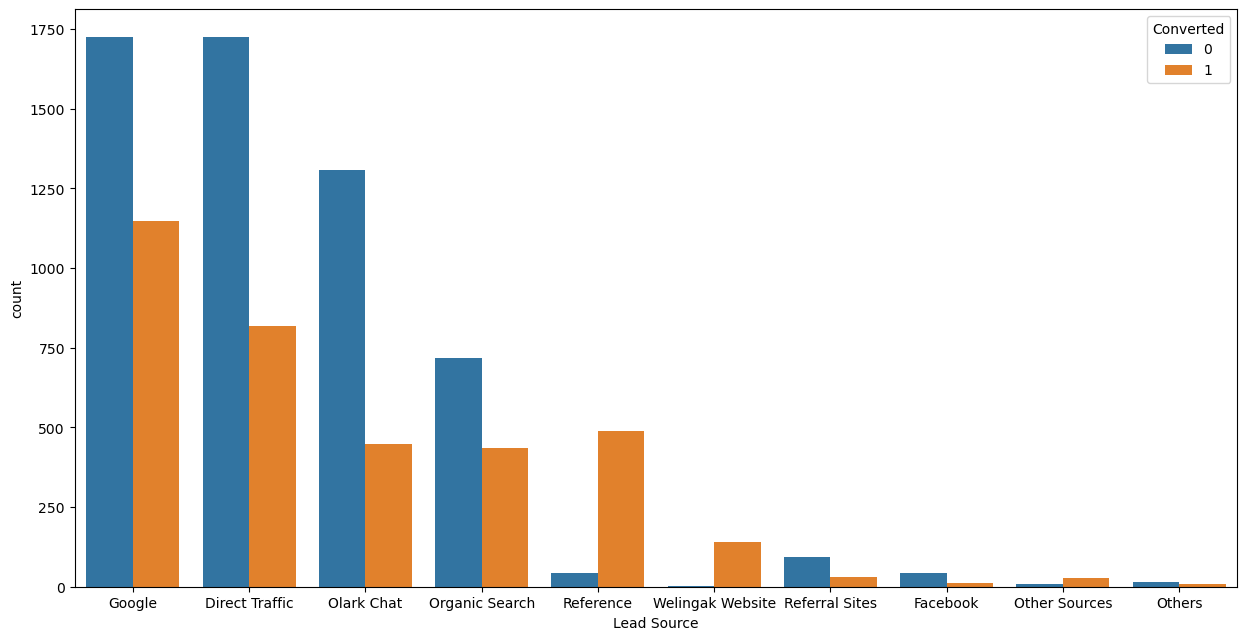

In [25]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call','Live Chat','NC_EDM','Pay per Click Ads','Press_Release',
                    'Social Media','WeLearn','bing','blog','testone','welearnblog_Home','youtubechannel'], 'Others')

fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data, order = data['Lead Source'].value_counts().index)
plt.show()

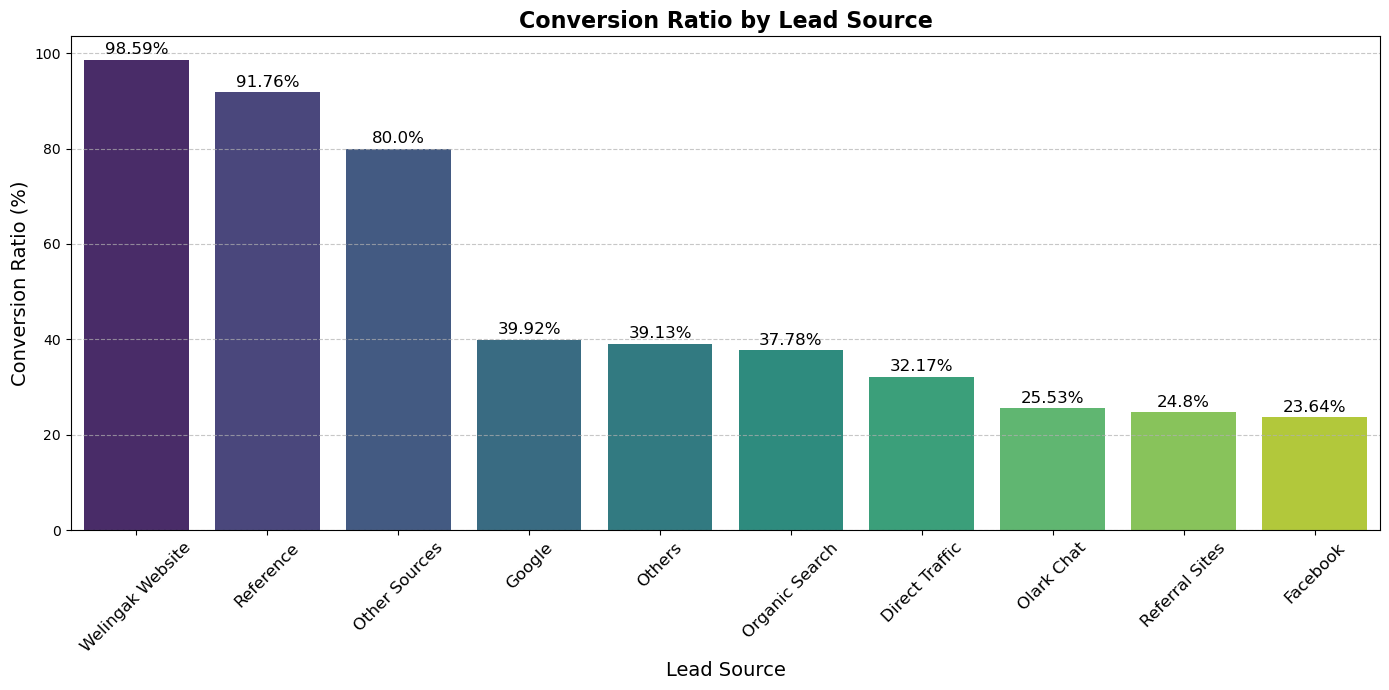

In [26]:
d = {}
for val in data['Lead Source'].unique():
    converted_sum = data[data['Lead Source'] == val]['Converted'].sum()
    total_leads = data[data['Lead Source'] == val]['Converted'].count()
    not_converted = total_leads - converted_sum
    d[val] = [total_leads,converted_sum, not_converted, round(converted_sum / total_leads * 100, 2)]


df = pd.DataFrame.from_dict(d, orient='index').rename(
    columns={0: 'Leads', 1: 'Converted', 2: 'Not Converted', 3: 'Conversion Ratio'}
).sort_values(by=['Conversion Ratio'], ascending=False)


plt.figure(figsize=(14, 7))
sns.barplot(
    x=df.index, 
    y='Conversion Ratio', 
    data=df, 
    palette='viridis',  
    order=df.index  
)


plt.title('Conversion Ratio by Lead Source', fontsize=16, fontweight='bold')
plt.xlabel('Lead Source', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)


plt.xticks(rotation=45, fontsize=12)

for index, value in enumerate(df['Conversion Ratio']):
    plt.text(
        index, 
        value + 0.5,  
        f'{value}%', 
        ha='center', 
        va='bottom', 
        fontsize=12
    )


plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()

plt.show()

In [27]:
data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    325
Email Link Clicked               267
Form Submitted on Website        116
Modified                         103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [28]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5599
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: count, dtype: int64

HYPOTHESIS FOR OCCUPATION WISE CONVERSION RATIO

In [29]:
d = {}
for val in data['What is your current occupation'].unique():
    converted_sum = data[data['What is your current occupation'] == val]['Converted'].sum()
    total_leads = data[data['What is your current occupation'] == val]['Converted'].count()
    not_converted = total_leads - converted_sum
    d[val] = [total_leads,converted_sum, not_converted, round(converted_sum / total_leads * 100, 2)]

pd.DataFrame.from_dict(d, orient='index').rename(columns={0: 'Leads', 1: 'Converted', 2: 'Not Converted', 3: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Leads,Converted,Not Converted,Conversion Ratio
Housewife,10,10,0,100.00
Working Professional,706,647,59,91.64
Businessman,8,5,3,62.50
Unemployed,5599,2440,3159,43.58
Student,210,78,132,37.14
Other,2706,380,2326,14.04


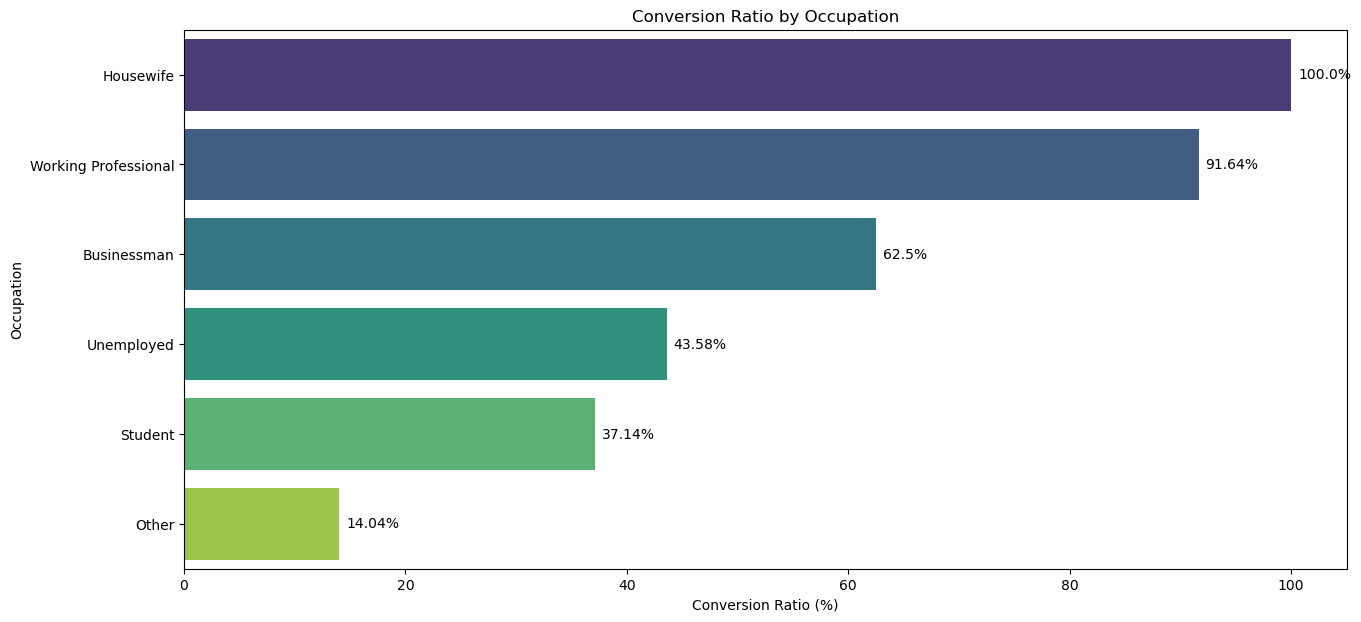

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(d, orient='index', columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio']).sort_values(by=['Conversion Ratio'], ascending=False)
df.reset_index(inplace=True)
df.rename(columns={'index': 'Occupation'}, inplace=True)


columns = ['Occupation', 'Leads', 'Converted', 'Not Converted', 'Conversion Ratio']
df = df[columns]
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df, x='Conversion Ratio', y='Occupation', palette='viridis')

for index, row in df.iterrows():
    ax.annotate(f"{row['Conversion Ratio']}%", 
                xy=(row['Conversion Ratio'], index), 
                xytext=(5, 0),  
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=10, 
                color='black')

plt.title('Conversion Ratio by Occupation')
plt.xlabel('Conversion Ratio (%)')
plt.ylabel('Occupation')
plt.show()

HYPOTHESIS FOR SPECIALIZATION WISE CONVERSION RATIO

In [31]:
d = {}
for val in data['Specialization'].unique():
    converted_sum = data[data['Specialization'] == val]['Converted'].sum()
    total_leads = data[data['Specialization'] == val]['Converted'].count()
    not_converted = total_leads - converted_sum
    d[val] = [total_leads,converted_sum, not_converted, round(converted_sum / total_leads * 100, 2)]

pd.DataFrame.from_dict(d, orient='index').rename(columns={0: 'Leads', 1: 'Converted', 2: 'Not Converted', 3: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Leads,Converted,Not Converted,Conversion Ratio
Healthcare Management,159,79,80,49.69
"Banking, Investment And Insurance",338,167,171,49.41
Marketing Management,872,427,445,48.97
Operations Management,503,238,265,47.32
Human Resource Management,848,388,460,45.75
Business Administration,403,179,224,44.42
Supply Chain Management,349,151,198,43.27
Finance Management,2889,1234,1655,42.71
Rural and Agribusiness,73,31,42,42.47
Hospitality Management,114,48,66,42.11


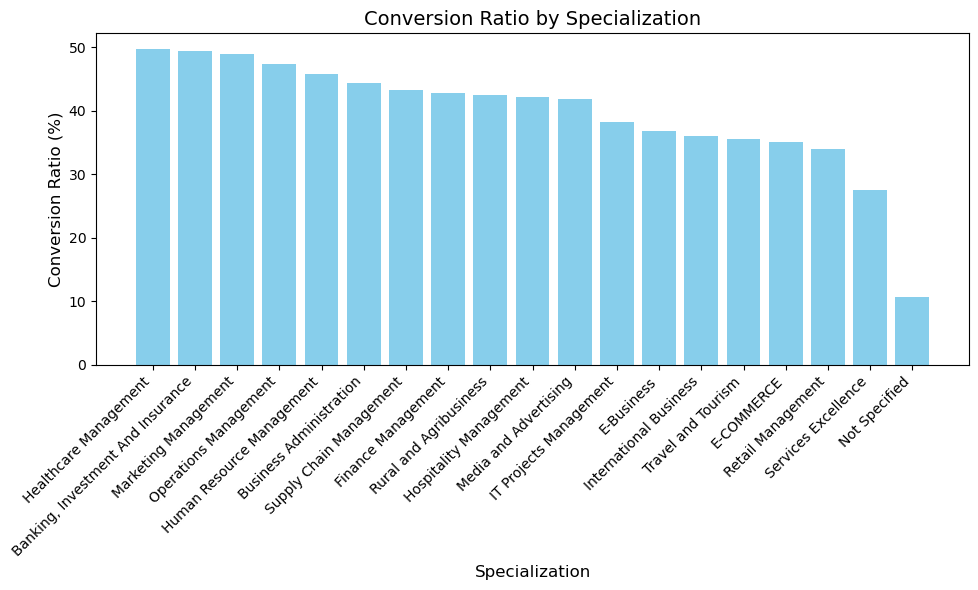

In [32]:
import matplotlib.pyplot as plt

# Existing code
d = {}
for val in data['Specialization'].unique():
    converted_sum = data[data['Specialization'] == val]['Converted'].sum()
    total_leads = data[data['Specialization'] == val]['Converted'].count()
    not_converted = total_leads - converted_sum
    d[val] = [total_leads, converted_sum, not_converted, round(converted_sum / total_leads * 100, 2)]

df = pd.DataFrame.from_dict(d, orient='index').rename(
    columns={0: 'Leads', 1: 'Converted', 2: 'Not Converted', 3: 'Conversion Ratio'}
).sort_values(by=['Conversion Ratio'], ascending=False)


# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Conversion Ratio'], color='skyblue')
plt.xlabel('Specialization', fontsize=12)
plt.ylabel('Conversion Ratio (%)', fontsize=12)
plt.title('Conversion Ratio by Specialization', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

HYPOTHESIS FOR CITY WISE CONVERSION RATIO

In [33]:
d = {}
for val in data['City'].unique():
    converted_sum = data[data['City'] == val]['Converted'].sum()
    total_leads = data[data['City'] == val]['Converted'].count()
    not_converted = total_leads - converted_sum
    d[val] = [total_leads,converted_sum, not_converted, round(converted_sum / total_leads * 100, 2)]

pd.DataFrame.from_dict(d, orient='index').rename(columns={0: 'Leads', 1: 'Converted', 2: 'Not Converted', 3: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Leads,Converted,Not Converted,Conversion Ratio
Select,2249,1103,1146,49.04
Thane & Outskirts,752,338,414,44.95
Other Cities of Maharashtra,457,201,256,43.98
Other Metro Cities,379,154,225,40.63
Other Cities,692,277,415,40.03
Mumbai,3791,1396,2395,36.82
Tier II Cities,74,25,49,33.78
Unknown City,845,66,779,7.81


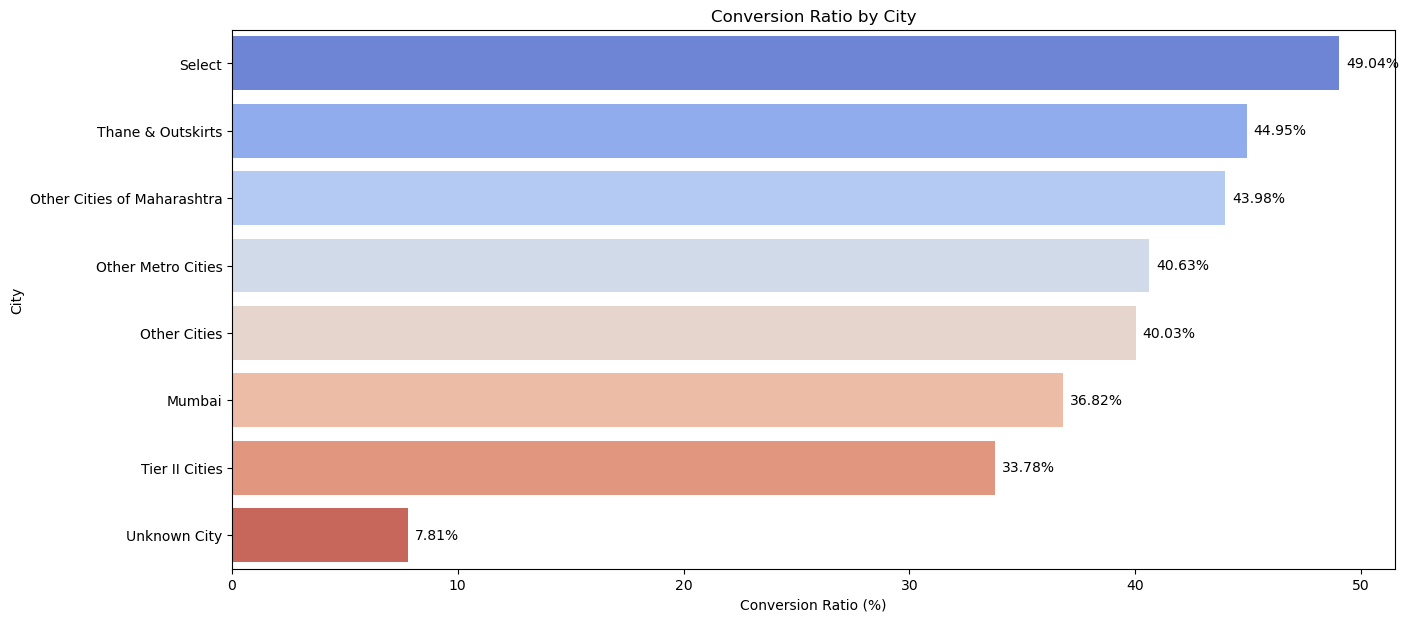

In [34]:
# Group data by City and calculate conversion metrics
city_data = {}
for city in data['City'].unique():
    converted_sum = data[data['City'] == city]['Converted'].sum()
    total_leads = data[data['City'] == city]['Converted'].count()
    not_converted = total_leads - converted_sum
    city_data[city] = [total_leads, converted_sum, not_converted, round(converted_sum / total_leads * 100, 2)]

# Create a DataFrame from the city data
city_df = pd.DataFrame.from_dict(city_data, orient='index', columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio']).sort_values(by=['Conversion Ratio'], ascending=False)

# Plot the conversion ratio by city
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=city_df.reset_index(), x='Conversion Ratio', y='index', palette='coolwarm')
plt.title('Conversion Ratio by City')
plt.xlabel('Conversion Ratio (%)')
plt.ylabel('City')

# Annotate the bars with conversion ratios
for index, row in city_df.reset_index().iterrows():
    ax.annotate(f"{row['Conversion Ratio']}%", 
                xy=(row['Conversion Ratio'], index), 
                xytext=(5, 0),  
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=10, 
                color='black')

plt.show()

HYPOTHESIS FOR LEAD QUALITY

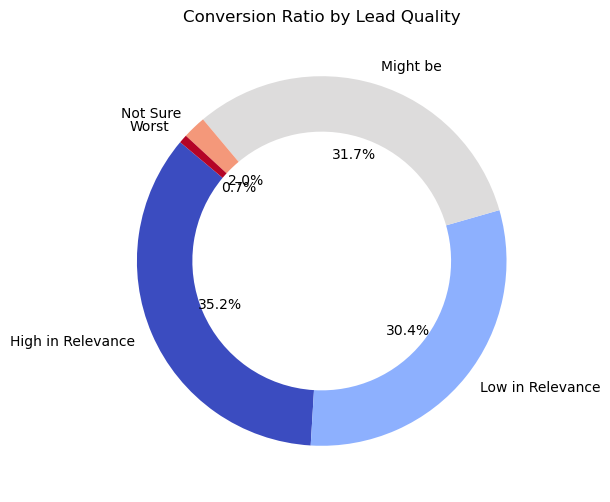

In [35]:
# Calculate the conversion ratio for each Lead Quality
lead_quality_data = data.groupby('Lead Quality')['Converted'].sum() / data.groupby('Lead Quality')['Converted'].count() * 100

# Plot the doughnut chart
plt.figure(figsize=(10, 6))
lead_quality_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='coolwarm', wedgeprops=dict(width=0.3))
plt.title('Conversion Ratio by Lead Quality')
plt.ylabel('')  # Remove y-axis label for better visualization
plt.show()


HYPOTHESIS FOR CONVERSION BY FREE COPY OF MASTERING THE INTERVIEW

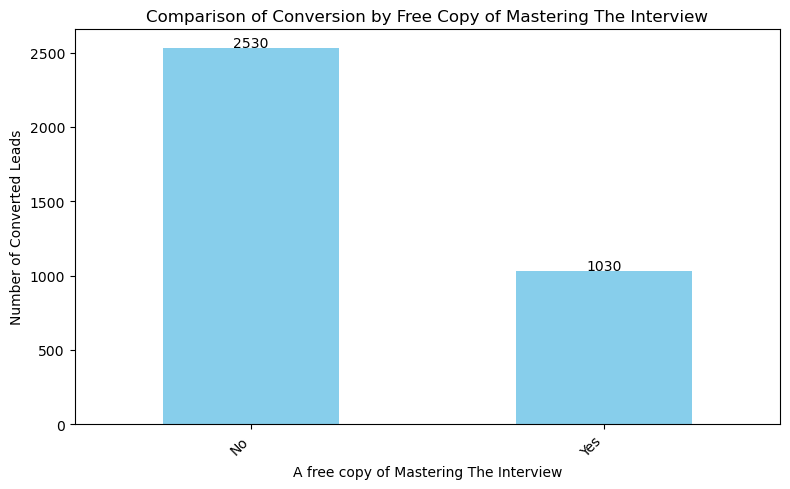

In [36]:
# Group by 'A free copy of Mastering The Interview' and calculate the sum of 'Converted'
comparison_data = data.groupby('A free copy of Mastering The Interview')['Converted'].sum()

# Plot the bar chart
plt.figure(figsize=(8, 5))

# Annotate each bar with the count of converted leads
for index, value in enumerate(comparison_data):
    plt.text(index, value + 10, f"{value}", ha='center', fontsize=10)
comparison_data.plot(kind='bar', color='skyblue')
plt.title('Comparison of Conversion by Free Copy of Mastering The Interview')
plt.xlabel('A free copy of Mastering The Interview')
plt.ylabel('Number of Converted Leads')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Healthcare Management to Not Specified
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Leads             19 non-null     int64  
 1   Converted         19 non-null     int64  
 2   Not Converted     19 non-null     int64  
 3   Conversion Ratio  19 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 760.0+ bytes


HYPOTHESIS BASED ON TOTAL VISITS

  Visit Range  Leads  Converted  Not Converted  Conversion Ratio
0         0-5   7610       2863           4747             37.62
1        6-10   1277        533            744             41.74
2       11-15    233        117            116             50.21
3       16-20     73         28             45             38.36
4         20+     47         20             27             42.55


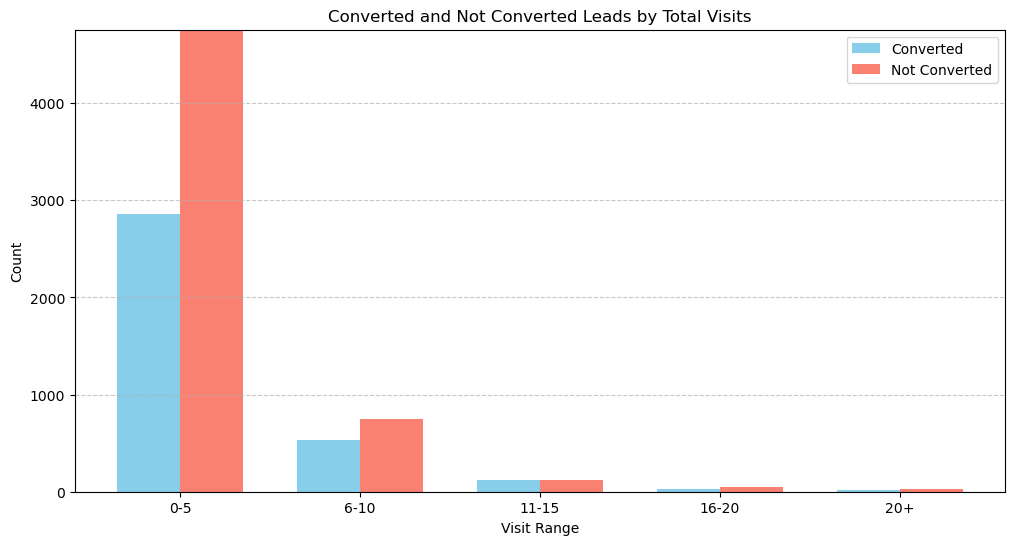

In [38]:
# Hypothesis : If a not paying customer has more visits then he can be converted to paying customer

df=pd.read_csv('Lead_Scoring_cleaned_data.csv') 
 
# Define visit ranges as specified
bins = [0, 6, 11, 16, 21, float('inf')]  # Define the ranges
labels = ['0-5', '6-10', '11-15', '16-20', '20+']  # Labels for the ranges
 
# Create a new column for visit ranges
df['Visit Range'] = pd.cut(df['TotalVisits'], bins=bins, labels=labels, right=False)
 
# Initialize a dictionary to hold the summary data
summary_data = {}
 
# Calculate the summary for each visit range
for val in labels:  # Iterate over the defined labels to ensure all ranges are included
    converted_sum = df[df['Visit Range'] == val]['Converted'].sum()  # Sum of converted leads
    total_leads = df[df['Visit Range'] == val]['Converted'].count()  # Total leads in the range
    not_converted = total_leads - converted_sum  # Calculate not converted leads
    conversion_ratio = round(converted_sum / total_leads * 100, 2) if total_leads > 0 else 0  # Conversion ratio
    summary_data[val] = [total_leads, converted_sum, not_converted, conversion_ratio]  # Store in dictionary
 
# Create a DataFrame from the summary data
summary_df = pd.DataFrame.from_dict(summary_data, orient='index',
                                     columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio'])
 
# Reset index for plotting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Visit Range'}, inplace=True)
 
# Sort the DataFrame by Conversion Ratio in descending order
summary_df_sorted = summary_df.sort_values(by='Conversion Ratio', ascending=False)
 
# Print the summary DataFrame to check the counts
print(summary_df)
 
# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
bar_width = 0.35  # Width of the bars
x = range(len(summary_df))  # X locations for the groups
 
# Create bars for converted and not converted
plt.bar(x, summary_df['Converted'], width=bar_width, label='Converted', color='skyblue')  # Converted leads
plt.bar([p + bar_width for p in x], summary_df['Not Converted'], width=bar_width, label='Not Converted', color='salmon')  # Not converted leads
 
# Adding labels and title
plt.title('Converted and Not Converted Leads by Total Visits')  # Title of the plot
plt.xlabel('Visit Range')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks([p + bar_width / 2 for p in x], summary_df['Visit Range'])  # Center the x-ticks
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, summary_df[['Converted', 'Not Converted']].max().max() + 10)  # Set y-axis limit for better visibility
 
plt.show()  # Display the plot

HYPOTHESIS BASED ON TIME SPENT 

  Time Spent  Leads  Converted  Not Converted  Conversion Ratio
3  1501-2000    575        411            164             71.48
2  1001-1500   1528       1053            475             68.91
4      2000+     22         15              7             68.18
1   501-1000   1042        599            443             57.49
0      0-500   6073       1483           4590             24.42


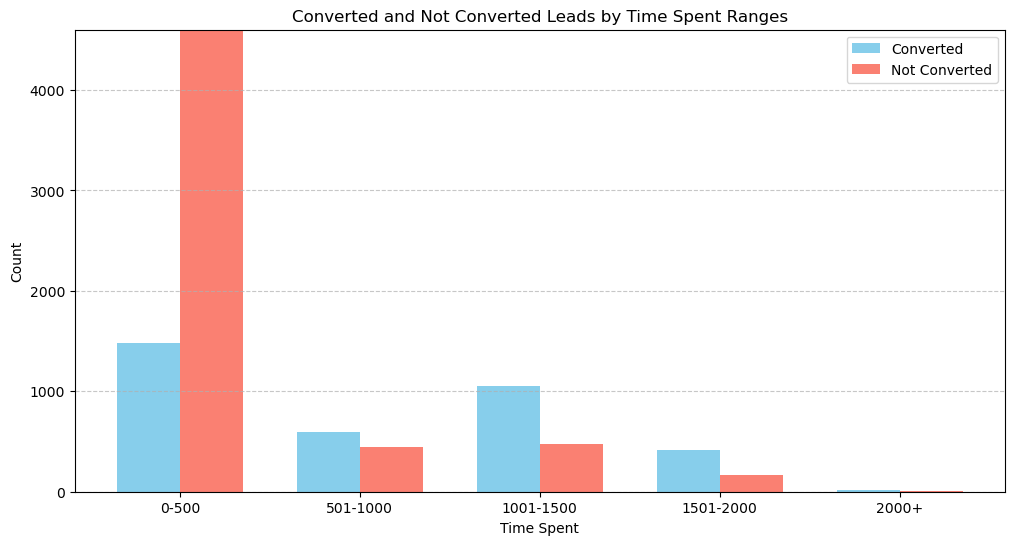

In [39]:
# Hypothesis: If a non-paying customer has spent time on website greater than 1000 then he can be converted to paying customer
 
bins = [0, 501, 1001, 1501, 2001, float('inf')]  # Define the ranges
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2000+']  # Labels for the ranges
 
# Create a new column for visit ranges
df['Time Spent'] = pd.cut(df['Total Time Spent on Website'], bins=bins, labels=labels, right=False)
 
# print(df['Visit Range'])
 
# Step 6: Initialize a dictionary to hold the summary data
summary_data = {}
 
# Calculate the summary for each visit range
for val in labels:  # Iterate over the defined labels to ensure all ranges are included
    converted_sum = df[df['Time Spent'] == val]['Converted'].sum()  # Sum of converted leads
    total_leads = df[df['Time Spent'] == val]['Converted'].count()  # Total leads in the range
    not_converted = total_leads - converted_sum  # Calculate not converted leads
    conversion_ratio = round(converted_sum / total_leads * 100, 2) if total_leads > 0 else 0  # Conversion ratio
    summary_data[val] = [total_leads, converted_sum, not_converted, conversion_ratio]  # Store in dictionary
 
# Create a DataFrame from the summary data
summary_df = pd.DataFrame.from_dict(summary_data, orient='index',
                                     columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio'])
 
# Reset index for plotting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Time Spent'}, inplace=True)
 
# Sort the DataFrame by Conversion Ratio in descending order
summary_df_sorted = summary_df.sort_values(by='Conversion Ratio', ascending=False)
 
# Print the summary DataFrame to check the counts
print(summary_df_sorted)
 
# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
bar_width = 0.35  # Width of the bars
x = range(len(summary_df))  # X locations for the groups
 
# Create bars for converted and not converted
plt.bar(x, summary_df['Converted'], width=bar_width, label='Converted', color='skyblue')  # Converted leads
plt.bar([p + bar_width for p in x], summary_df['Not Converted'], width=bar_width, label='Not Converted', color='salmon')  # Not converted leads
 
# Adding labels and title
plt.title('Converted and Not Converted Leads by Time Spent Ranges')  # Title of the plot
plt.xlabel('Time Spent')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks([p + bar_width / 2 for p in x], summary_df['Time Spent'])  # Center the x-ticks
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, summary_df[['Converted', 'Not Converted']].max().max() + 10)  # Set y-axis limit for better visibility
plt.show()  # Display the plot

CONVERSION RATE VS COUNTRY,CITY,LAST ACTIVITY,LAST NOTABLE ACTIVITY,TAGS,LEAD QUALITY...

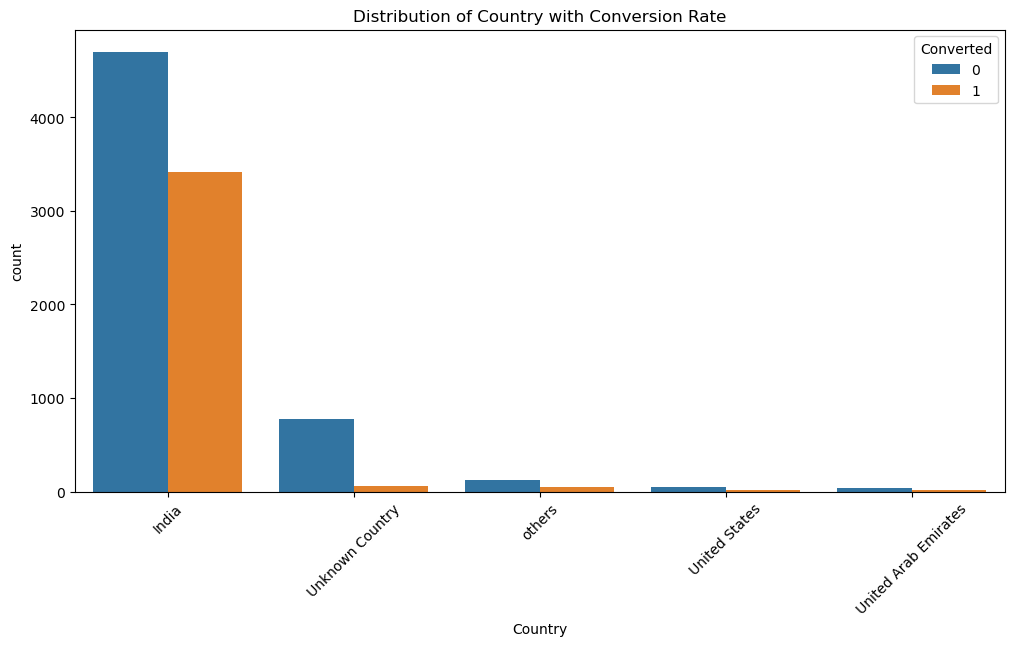

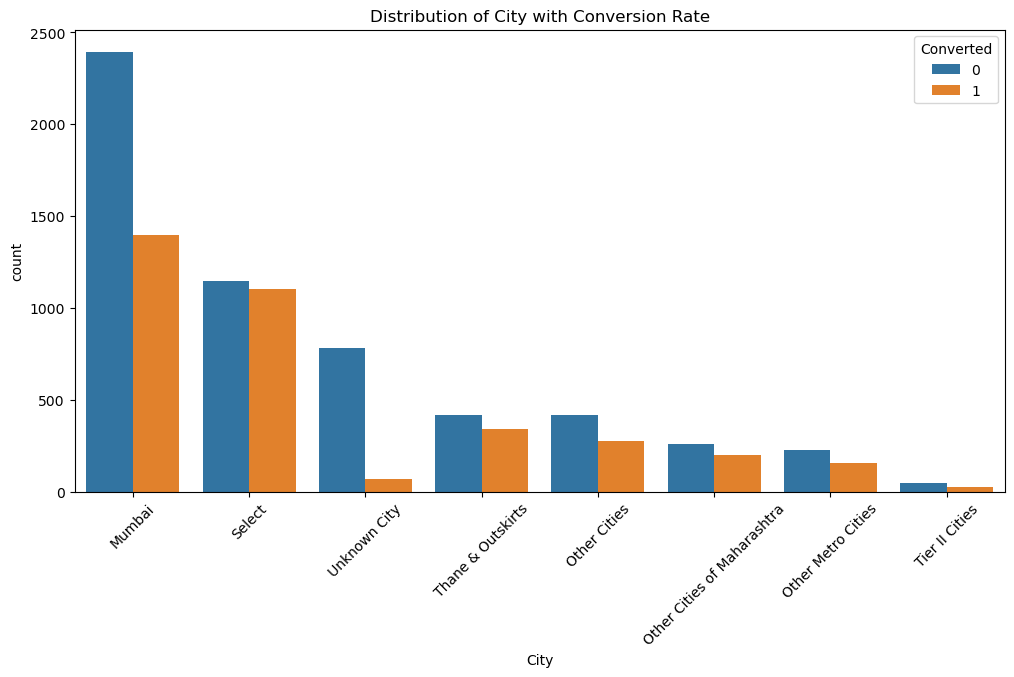

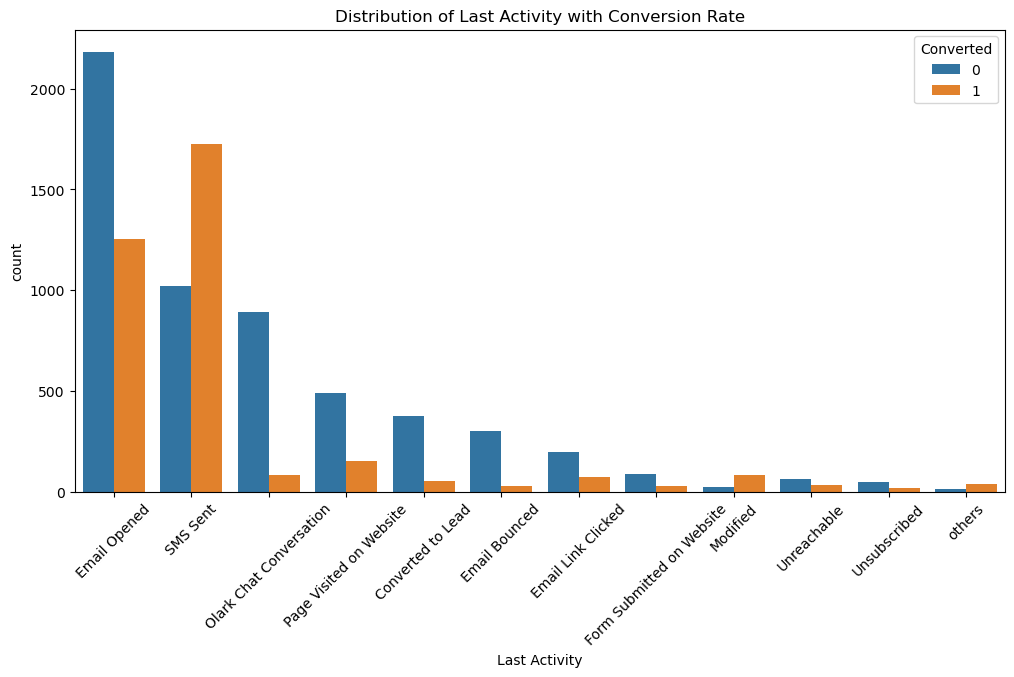

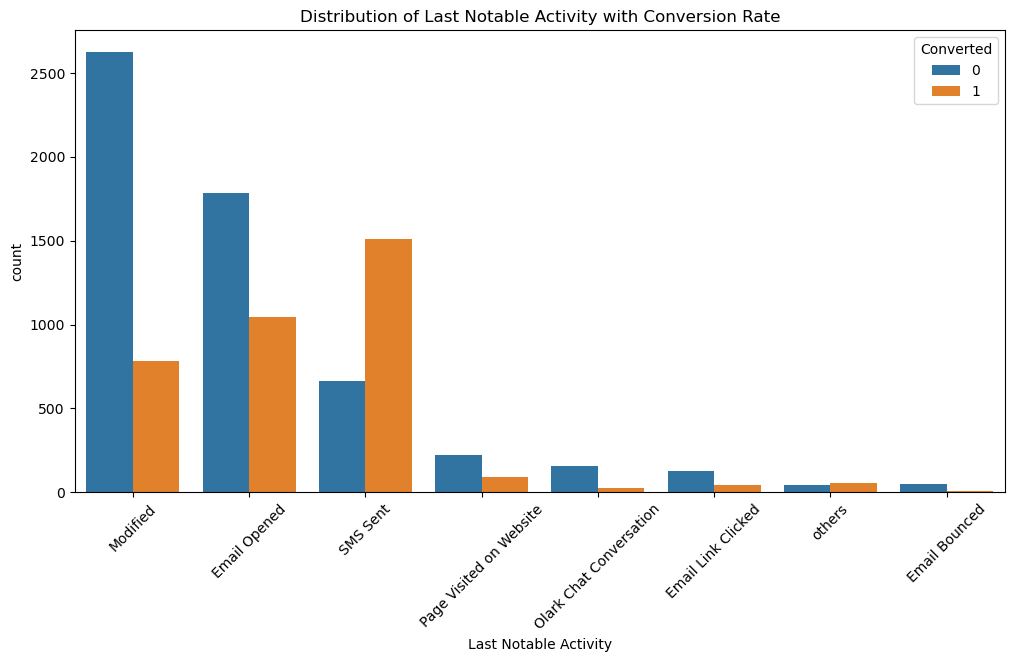

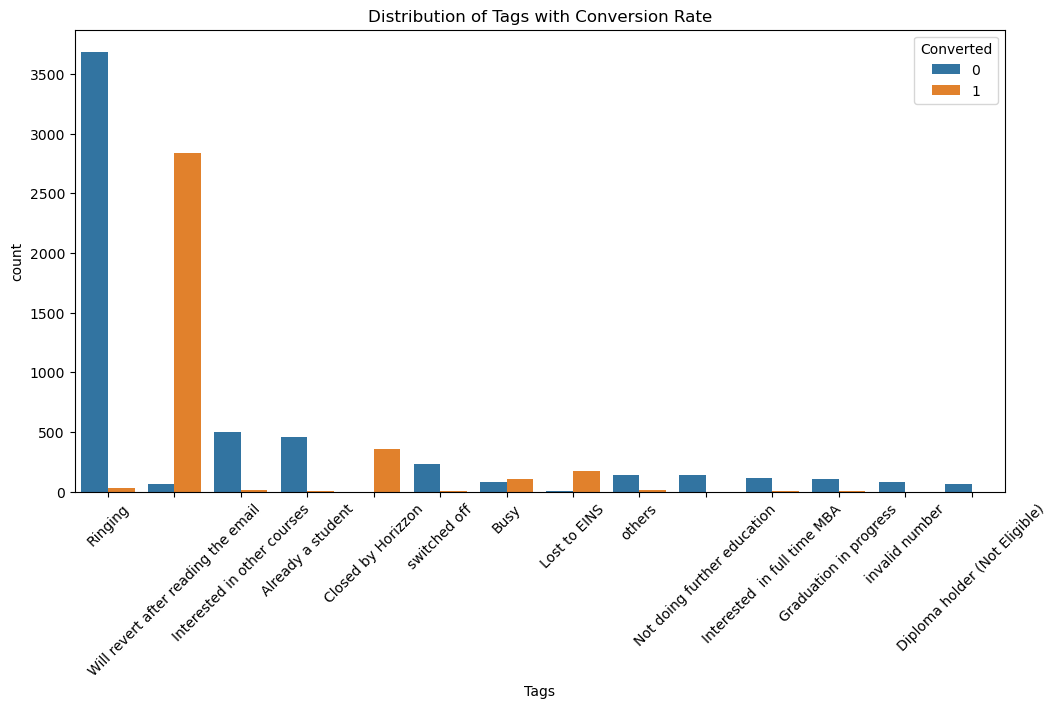

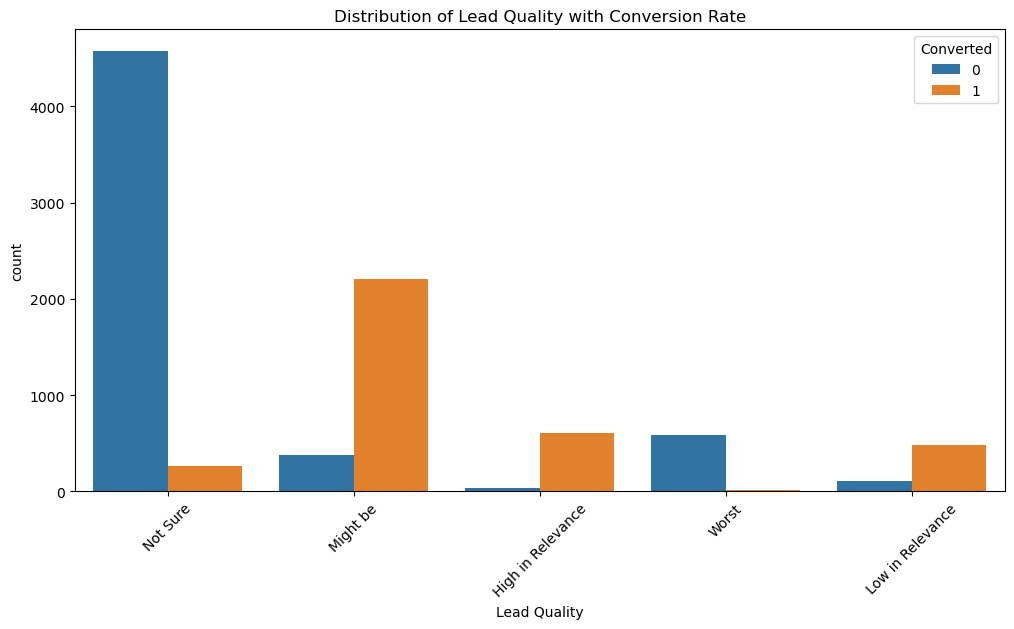

In [40]:
# Function to group less frequent categories
def group_rare_categories(column, threshold=50):
    value_counts = data[column].value_counts()
    rare_categories = value_counts[value_counts < threshold].index
    data[column] = data[column].apply(lambda x: "others" if x in rare_categories else x)

# Apply grouping to categorical columns
categorical_columns = ["Country", "City", "Last Activity", "Last Notable Activity", "Tags", "Lead Quality"]
for col in categorical_columns:
    group_rare_categories(col)

# Function to plot categorical variables against Conversion Rate
def plot_categorical_distribution(column):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=column, data=data, order=data[column].value_counts().index, hue=data['Converted'])
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {column} with Conversion Rate")
    plt.show()

# Plot for each categorical variable
for col in categorical_columns:
    plot_categorical_distribution(col)

CONVERSION RATE VS COUNTRY-CITY WISE

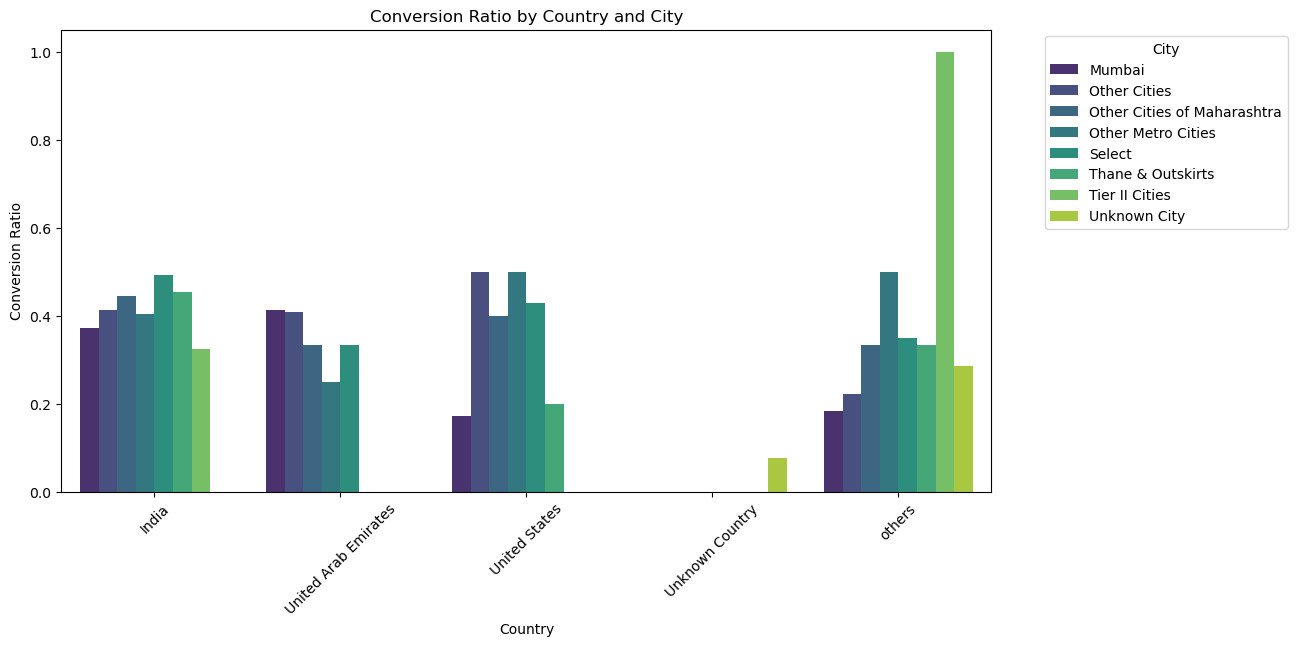

In [41]:
# Grouping by Country and City to calculate conversion rate
grouped = data.groupby(["Country", "City"]).Converted.mean().reset_index()

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Country", y="Converted", hue="City", data=grouped, palette="viridis")
plt.title("Conversion Ratio by Country and City")
plt.ylabel("Conversion Ratio")
plt.xlabel("Country")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


CONVERTED LEADS BY TAGS

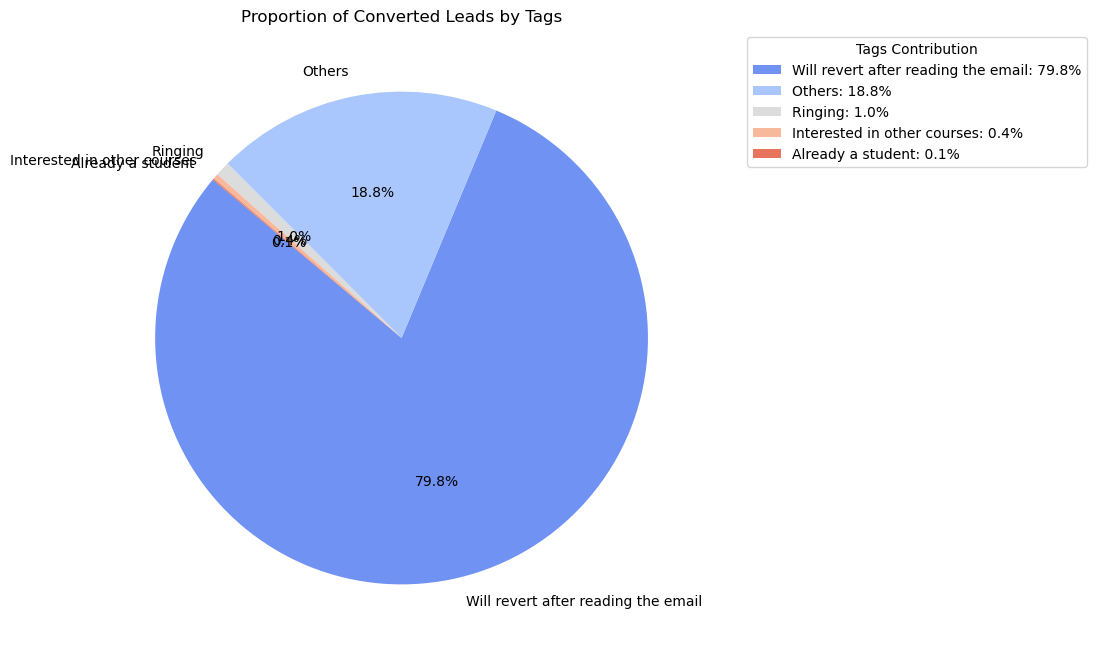

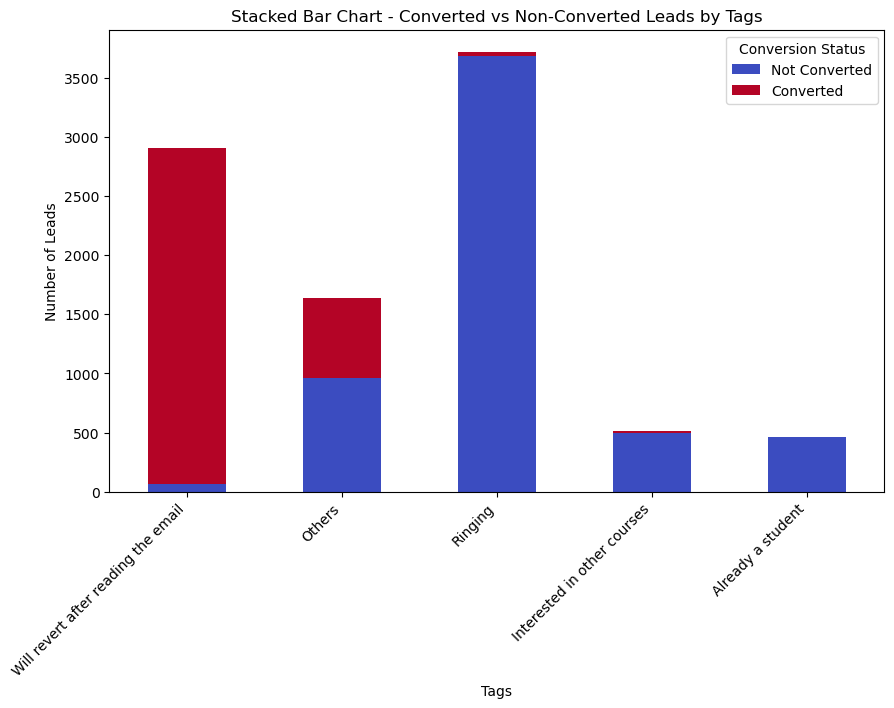

In [42]:
threshold = 0.05  # Adjust percentage as needed
tag_counts = data['Tags'].value_counts(normalize=True)  # Get proportion of each category
common_tags = tag_counts[tag_counts > threshold].index  # Select frequent categories
data['Tags'] = data['Tags'].apply(lambda x: x if x in common_tags else 'Others')

# Calculate conversion counts for each Tag
tags_conversion = data.groupby(['Tags', 'Converted']).size().unstack().fillna(0)

# --- 1. Improved Pie Chart for Conversion Ratio with Legend ---
plt.figure(figsize=(8, 8))
converted_counts = data[data['Converted'] == 1]['Tags'].value_counts()

# Compute percentages for the legend
total_converted = converted_counts.sum()
legend_labels = [f"{tag}: {count / total_converted * 100:.1f}%" for tag, count in converted_counts.items()]

# Plot Pie Chart
wedges, texts, autotexts = plt.pie(
    converted_counts, labels=converted_counts.index, autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm', len(converted_counts)), startangle=140
)

# Adjust legend to show percentages
plt.legend(wedges, legend_labels, title="Tags Contribution", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Proportion of Converted Leads by Tags")
plt.show()

# --- 2. Improved Stacked Bar Chart with Conversion Contribution in Legend ---
tags_conversion = tags_conversion.sort_values(by=1, ascending=False)  # Sort by conversion count

# Calculate percentage of conversions for legend
conversion_percentages = (tags_conversion[1] / tags_conversion.sum(axis=1)) * 100
legend_labels_bar = [f"{tag}: {pct:.1f}%" for tag, pct in zip(tags_conversion.index, conversion_percentages)]

# Plot Stacked Bar Chart
ax = tags_conversion.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Stacked Bar Chart - Converted vs Non-Converted Leads by Tags")
plt.ylabel("Number of Leads")
plt.xlabel("Tags")
plt.xticks(rotation=45, ha='right')

# Custom legend with conversion percentages
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, ["Not Converted", "Converted"], title="Conversion Status", loc="upper right")

plt.show()

CONVERTED LEADS BY LAST ACTIVITY,LAST NOTABLE ACTIVITY

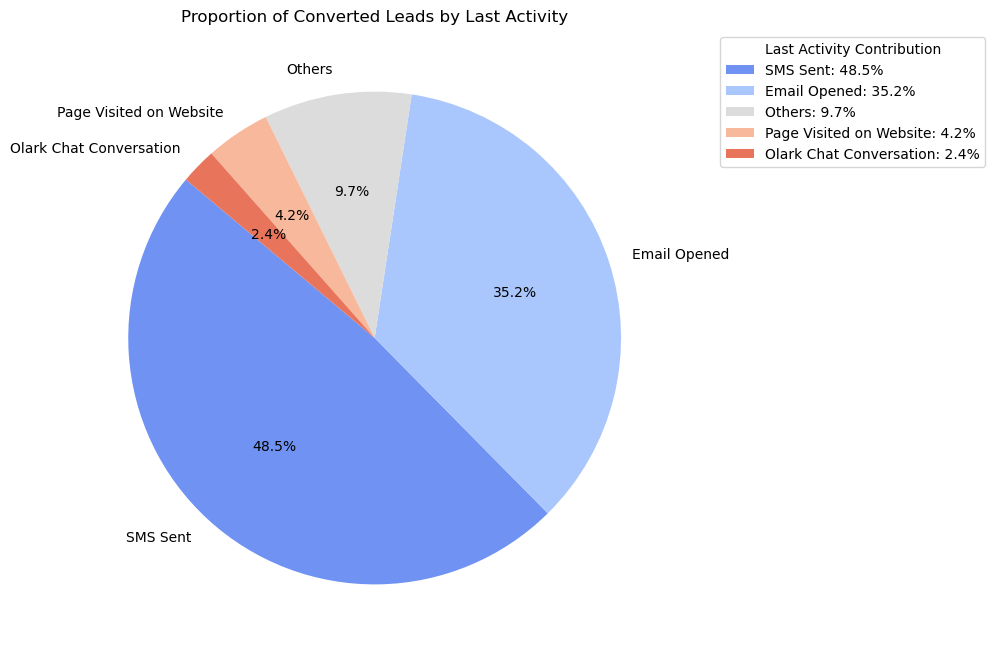

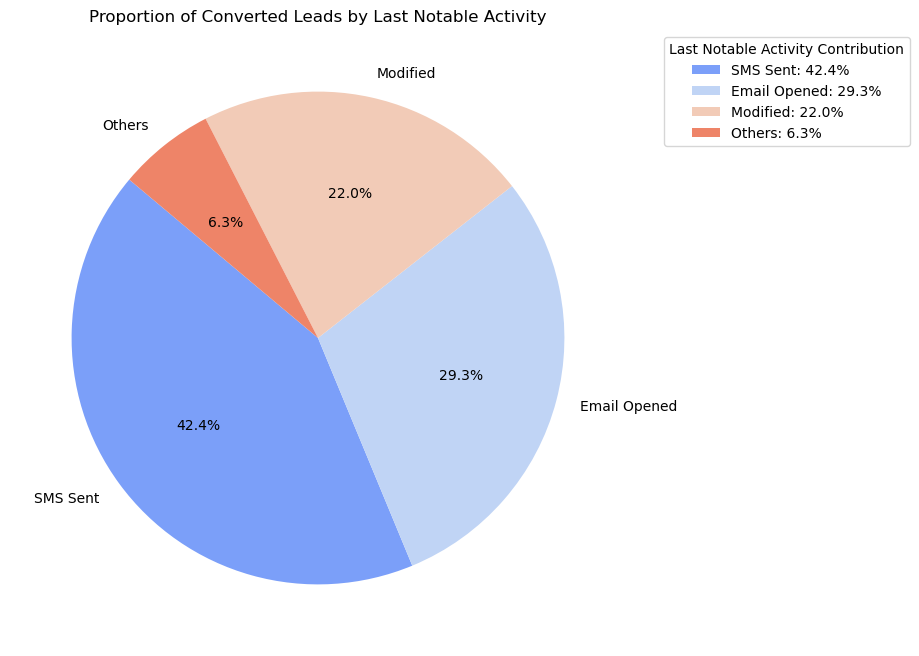

In [43]:
# --- Group less frequent values into "Others" dynamically ---
def group_categories(data, column, threshold=0.05):
    value_counts = data[column].value_counts(normalize=True)
    common_values = value_counts[value_counts > threshold].index
    data[column] = data[column].apply(lambda x: x if x in common_values else 'Others')
    return data

data = group_categories(data, 'Last Activity')
data = group_categories(data, 'Last Notable Activity')

# --- Calculate conversion counts ---
last_activity_conversion = data.groupby(['Last Activity', 'Converted']).size().unstack().fillna(0)
notable_activity_conversion = data.groupby(['Last Notable Activity', 'Converted']).size().unstack().fillna(0)

# --- 1. Pie Chart for Last Activity Conversion Ratio ---
plt.figure(figsize=(8, 8))
converted_counts = data[data['Converted'] == 1]['Last Activity'].value_counts()
total_converted = converted_counts.sum()
legend_labels = [f"{activity}: {count / total_converted * 100:.1f}%" for activity, count in converted_counts.items()]
wedges, texts, autotexts = plt.pie(
    converted_counts, labels=converted_counts.index, autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm', len(converted_counts)), startangle=140
)
plt.legend(wedges, legend_labels, title="Last Activity Contribution", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Proportion of Converted Leads by Last Activity")
plt.show()


# --- 2. Pie Chart for Last Notable Activity ---
plt.figure(figsize=(8, 8))
converted_counts = data[data['Converted'] == 1]['Last Notable Activity'].value_counts()
total_converted = converted_counts.sum()
legend_labels = [f"{activity}: {count / total_converted * 100:.1f}%" for activity, count in converted_counts.items()]
wedges, texts, autotexts = plt.pie(
    converted_counts, labels=converted_counts.index, autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm', len(converted_counts)), startangle=140
)
plt.legend(wedges, legend_labels, title="Last Notable Activity Contribution", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Proportion of Converted Leads by Last Notable Activity")
plt.show()


FEATURE EXTRACTION BASED ON THE HYPOTHESIS

In [44]:
import pandas as pd
import numpy as np
import matplotlib as mt
import seaborn

In [45]:
df=pd.read_csv("Lead_Scoring_cleaned_data.csv")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

CALCULATING ENGAGEMENT SCCORE BASED ON TIMESPENT,TOTAL VISITS,PAGE VIEW PER VISIT

In [47]:
df['Engagement Score'] = df['TotalVisits'] * df['Page Views Per Visit'] * (df['Total Time Spent on Website'] / 60)  # Convert seconds to minutes

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [49]:
df['Engagement Score']

0         0.000000
1       140.416667
2       102.133333
3         5.083333
4        47.600000
           ...    
9235    656.820000
9236     15.866667
9237     13.266667
9238     74.850000
9239    383.700000
Name: Engagement Score, Length: 9240, dtype: float64

DROP UNWANTED COLUMNS

In [50]:
df.drop(columns=["Prospect ID","Lead Number"],inplace=True)

In [51]:
df.drop(columns=["City","Country"],inplace=True)

In [52]:
df.drop(columns=["Last Notable Activity"],inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Converted                                      9240 non-null   int64  
 3   TotalVisits                                    9240 non-null   float64
 4   Total Time Spent on Website                    9240 non-null   int64  
 5   Page Views Per Visit                           9240 non-null   float64
 6   Last Activity                                  9240 non-null   object 
 7   Specialization                                 9240 non-null   object 
 8   What is your current occupation                9240 non-null   object 
 9   What matters most to you in choosing a course  9240 

In [54]:
df["Lead Quality"].value_counts()

Lead Quality
Not Sure             4835
Might be             2584
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [55]:
# Define the mapping (all lowercase)
quality_mapping = {
    'high in relevance': 4,
    'might be': 3,
    'not sure': 2,
    'low in relevance': 1,
    'worst': 0
}

# Apply mapping after converting to lowercase
df['Lead Quality Score'] = df['Lead Quality'].str.lower().map(quality_mapping)

In [56]:
df["Lead Quality Score"].value_counts()

Lead Quality Score
2    4835
3    2584
4     637
0     601
1     583
Name: count, dtype: int64

In [57]:
df.nunique()

Lead Origin                                         5
Lead Source                                        22
Converted                                           2
TotalVisits                                        43
Total Time Spent on Website                      1731
Page Views Per Visit                              116
Last Activity                                      18
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Tags                                               26
Lead Quality                                        5
Update me on Supply Chain Content                   1
Get updates on DM Content                           1
I agree to pay the amount through cheque            1
A free copy of Mastering The Interview              2
Engagement Score                                 4703
Lead Quality Score                                  5
dtype: int64

In [58]:
df["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [59]:
df["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [60]:
df["Tags"].value_counts()

Tags
Ringing                                              3720
Will revert after reading the email                  2908
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Converted                                      9240 non-null   int64  
 3   TotalVisits                                    9240 non-null   float64
 4   Total Time Spent on Website                    9240 non-null   int64  
 5   Page Views Per Visit                           9240 non-null   float64
 6   Last Activity                                  9240 non-null   object 
 7   Specialization                                 9240 non-null   object 
 8   What is your current occupation                9240 non-null   object 
 9   What matters most to you in choosing a course  9240 

In [62]:
df.drop(columns=["TotalVisits","Page Views Per Visit","Total Time Spent on Website","Lead Quality","Update me on Supply Chain Content","Get updates on DM Content","What matters most to you in choosing a course","I agree to pay the amount through cheque"],inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   Last Activity                           9240 non-null   object 
 4   Specialization                          9240 non-null   object 
 5   What is your current occupation         9240 non-null   object 
 6   Tags                                    9240 non-null   object 
 7   A free copy of Mastering The Interview  9240 non-null   object 
 8   Engagement Score                        9240 non-null   float64
 9   Lead Quality Score                      9240 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 722.0+ KB


In [64]:
df.nunique()

Lead Origin                                  5
Lead Source                                 22
Converted                                    2
Last Activity                               18
Specialization                              19
What is your current occupation              6
Tags                                        26
A free copy of Mastering The Interview       2
Engagement Score                          4703
Lead Quality Score                           5
dtype: int64

In [65]:
# df["A free copy of Mastering The Interview"]=df["A free copy of Mastering The Interview"].replace({"no":0,"yes":1},inplace=True)

In [66]:
df["A free copy of Mastering The Interview"].value_counts()

A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64

In [67]:
df["A free copy of Mastering The Interview"]=df["A free copy of Mastering The Interview"].replace({"no":0,"yes":1})
df["A free copy of Mastering The Interview"].value_counts()

A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64

In [68]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x == 'Yes' else 0)

SAVE EXTRACTED FEATURES INTO FEATURES.ENG FILE

In [69]:
df.to_csv("features_eng.csv",index=False)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   Last Activity                           9240 non-null   object 
 4   Specialization                          9240 non-null   object 
 5   What is your current occupation         9240 non-null   object 
 6   Tags                                    9240 non-null   object 
 7   A free copy of Mastering The Interview  9240 non-null   int64  
 8   Engagement Score                        9240 non-null   float64
 9   Lead Quality Score                      9240 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 722.0+ KB


In [71]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


STANDARDIZE THE CATEGORICAL DATA

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset

# Step 1: Convert categorical columns to numeric values
# Ensure you are converting the correct columns
df['Lead Source'] = df['Lead Source'].astype('category').cat.codes
df['Lead Origin'] = df['Lead Origin'].astype('category').cat.codes
df['Last Activity'] = df['Last Activity'].astype('category').cat.codes
df['Specialization'] = df['Specialization'].astype('category').cat.codes
df['What is your current occupation'] = df['What is your current occupation'].astype('category').cat.codes
df['Tags'] = df['Tags'].astype('category').cat.codes
print(df.head())

# Step 2: Select features to standardize
# Assuming you want to standardize the following columns
features_to_standardize = ['Lead Source', 'Lead Origin', 'Last Activity', 
                            'Specialization', 'What is your current occupation', 'Tags']

# Step 3: Initialize the StandardScaler
scaler = StandardScaler()

# Step 4: Fit and transform the selected features
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

# Step 5: Display the standardized DataFrame
print(df[features_to_standardize].head())

   Lead Origin  Lead Source  Converted  Last Activity  Specialization  \
0            0            6          0             11               4   
1            0            7          0              5               4   
2            1            1          1              5               1   
3            1            1          0             14              11   
4            1            3          1              1               4   

   What is your current occupation  Tags  \
0                                4     8   
1                                4    14   
2                                3    19   
3                                4    14   
4                                4    19   

   A free copy of Mastering The Interview  Engagement Score  \
0                                       0          0.000000   
1                                       0        140.416667   
2                                       1        102.133333   
3                                       0   

In [73]:
df.nunique()

Lead Origin                                  5
Lead Source                                 22
Converted                                    2
Last Activity                               18
Specialization                              19
What is your current occupation              6
Tags                                        26
A free copy of Mastering The Interview       2
Engagement Score                          4703
Lead Quality Score                           5
dtype: int64

STANDARDIZED FEATURES.....

In [74]:
df.to_csv("standardized_features.csv",index=False)

MAPPING FILE FOR STANDARDIZED FEATURES (CATEGORICAL DATA)

In [75]:
import pandas as pd

# Load the string values DataFrame
string_df = pd.read_csv('features_eng.csv')  # Replace with your actual file name

# Load the integer values DataFrame
integer_df = pd.read_csv('standardized_features.csv')  # Replace with your actual file name

# Create a mapping dictionary
mapping_dict = {}
string_df.drop(columns=['Engagement Score','Lead Quality Score','Converted','A free copy of Mastering The Interview'], inplace=True)

# Assuming both DataFrames have the same structure and the same categorical columns
for column in string_df.columns:
    if column in integer_df.columns:
        # Create a mapping for the current column
        mapping_dict[column] = {
            string_value: integer_value 
            for string_value, integer_value in zip(string_df[column], integer_df[column])
        }

# Create a DataFrame for the mapping
mapping_df = pd.DataFrame([(column, string_value, integer_value) 
                            for column, mapping in mapping_dict.items() 
                            for string_value, integer_value in mapping.items()],
                          columns=['Column', 'category_name', 'Standardized_Value'])

# Save the mapping DataFrame to a CSV file
mapping_df.to_csv('mapping_file.csv', index=False)

# Display the mapping DataFrame
print(mapping_df)

         Column                                      category_name  \
0   Lead Origin                                                API   
1   Lead Origin                            Landing Page Submission   
2   Lead Origin                                      Lead Add Form   
3   Lead Origin                                        Lead Import   
4   Lead Origin                                     Quick Add Form   
..          ...                                                ...   
91         Tags                                    Lateral student   
92         Tags                           Interested in Next batch   
93         Tags                   Recognition issue (DEC approval)   
94         Tags  Want to take admission but has financial problems   
95         Tags                          University not recognized   

    Standardized_Value  
0            -1.108763  
1             0.469572  
2             2.047907  
3             3.626242  
4             5.204577  
..       

MODEL TRAINING......

LOGISTIC REGRESSION
SVM
RANDOM FOREST
LIGHTGBM

In [76]:
import pandas as pd
df= pd.read_csv('standardized_features.csv')

SPECIFY FEATURES AND TARGET VARIABLE

In [77]:
X = df.drop(columns=['Converted'])
y = df['Converted']    

MODEL TRAINING USING FOUR MODELS

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# SVM Model
svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
    
# Random Forest Model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# LightGBM Model
lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
class_report_lgbm = classification_report(y_test, y_pred_lgbm)

print(f'Classification Report - logistic regression:\n{class_report}')

print(f'Classification Report - SVM:\n{class_report_svm}')   

print(f'Classification Report - Random Forest:\n{class_report_rf}')

print(f'Classification Report - LightGBM:\n{class_report_lgbm}')


c:\Users\manoj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2820, number of negative: 4572
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 7392, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Classification Report - logistic regression:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1107
           1       0.74      0.79      0.77       741

    accuracy                           0.81      1848
   macro avg       0.80      0.80      0.80      1848
weighted avg       0.81      0.81      0.81      1

CONFUSION MATRIX FOR MODELS

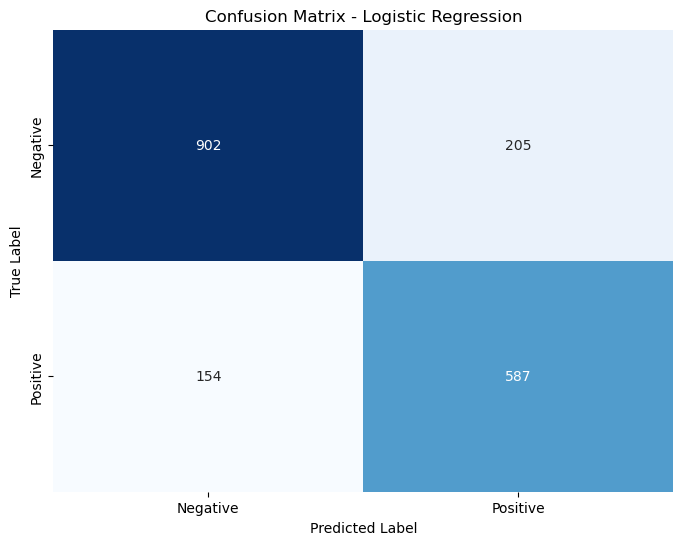

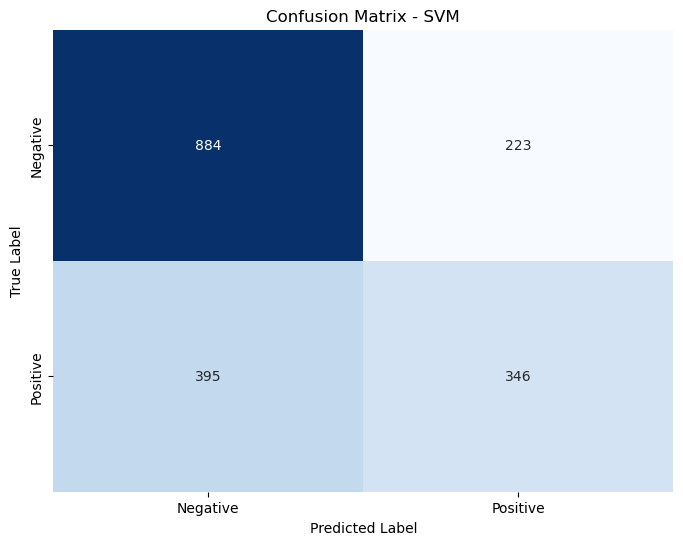

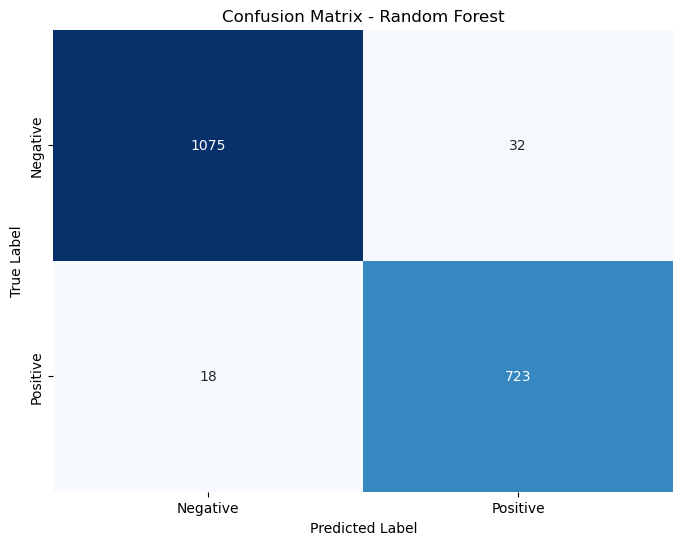

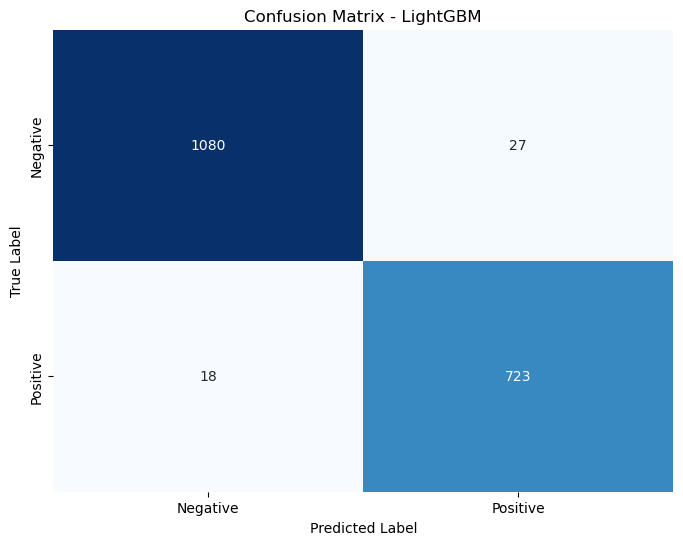

In [81]:


# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(conf_matrix, 'Logistic Regression')
plot_confusion_matrix(conf_matrix_svm, 'SVM')
plot_confusion_matrix(conf_matrix_rf, 'Random Forest')
plot_confusion_matrix(conf_matrix_lgbm, 'LightGBM')

HYPER PARAMETER TUNING FOR LIGHTGBM

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distribution
param_dist = {
    'num_leaves': [31, 50, 100, 200],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'min_data_in_leaf': [20, 50, 100],
    'feature_fraction': [0.8, 0.9, 1.0],
    'bagging_fraction': [0.8, 0.9, 1.0],
    'bagging_freq': [1, 5, 10],
    'class_weight': ['balanced', None]
}

# Initialize the model
lgbm_model = LGBMClassifier()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lgbm_model, 
                                   param_distributions=param_dist, 
                                   n_iter=100,  # Number of parameter settings to sample
                                   scoring='accuracy', 
                                   cv=5, 
                                   verbose=1, 
                                   n_jobs=-1, 
                                   random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'num_leaves': 100, 'n_estimators': 200, 'min_data_in_leaf': 20, 'max_depth': 30, 'learning_rate': 0.01, 'feature_fraction': 0.9, 'class_weight': 'balanced', 'bagging_freq': 1, 'bagging_fraction': 0.9}
Best Cross-Validation Score: 0.9779


HYPER PARAMETER TUNING FOR SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
# Assuming X and y are your features and target variable
# X, y = load_your_data()  # Replace with your data loading method

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # Only relevant for 'rbf' and 'poly' kernels
}
#
# Initialize the SVM model
svm_model = SVC()

# Set up GridSearchCV with k-fold cross-validation
grid_search_svm = GridSearchCV(estimator=svm_model, 
                                param_grid=param_grid_svm, 
                                scoring='accuracy', 
                                cv=5,  # 5-fold cross-validation
                                verbose=1, 
                                n_jobs=-1)  # Use all available cores

# Fit the model using GridSearchCV
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print(f"Best Parameters for SVM: {best_params_svm}")
print(f"Best Cross-Validation Score for SVM: {best_score_svm:.4f}")

# Evaluate the best model on the test set
best_model_svm = grid_search_svm.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)

# Print classification report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Print accuracy on the test set
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Test Set Accuracy for SVM: {accuracy_svm:.4f}")

HYPER PARAMETER TUNING FOR RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
# Assuming X and y are your features and target variable
# X, y = load_your_data()  # Replace with your data loading method

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]  # Optional: to handle class imbalance
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Set up GridSearchCV with k-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, 
                               param_grid=param_grid_rf, 
                               scoring='accuracy', 
                               cv=5,  # 5-fold cross-validation
                               verbose=1, 
                               n_jobs=-1)  # Use all available cores

# Fit the model using GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f"Best Parameters for Random Forest: {best_params_rf}")
print(f"Best Cross-Validation Score for Random Forest: {best_score_rf:.4f}")

# Evaluate the best model on the test set
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

# Print classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Print accuracy on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Set Accuracy for Random Forest: {accuracy_rf:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest: {'class_weight': None, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score for Random Forest: 0.9746
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1107
           1       0.96      0.97      0.97       741

    accuracy                           0.97      1848
   macro avg       0.97      0.97      0.97      1848
weighted avg       0.97      0.97      0.97      1848

Test Set Accuracy for Random Forest: 0.9746


HYPER PARAMETER TUNING FOR LOGISTIC REGRESSION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
# Assuming X and y are your features and target variable
# X, y = load_your_data()  # Replace with your data loading method

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Solvers that support L1 and elasticnet
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Set up GridSearchCV with k-fold cross-validation
grid_search_lr = GridSearchCV(estimator=lr_model, 
                               param_grid=param_grid_lr, 
                               scoring='accuracy', 
                               cv=5,  # 5-fold cross-validation
                               verbose=1, 
                               n_jobs=-1)  # Use all available cores

# Fit the model using GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Get the best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"Best Parameters for Logistic Regression: {best_params_lr}")
print(f"Best Cross-Validation Score for Logistic Regression: {best_score_lr:.4f}")

# Evaluate the best model on the test set
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)

# Print classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

# Print accuracy on the test set
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Test Set Accuracy for Logistic Regression: {accuracy_lr:.4f}")

ACCURACY SCORE FOR TRAINING AND TESTING SET FOR LOGISTIC REGRESSION

In [ ]:
from sklearn.metrics import accuracy_score

# Fit the model on training data
model.fit(X_train, y_train)

# Get predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8061
Test Accuracy: 0.8068


c:\DATASCIENCE\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY SCORE FOR TRAINING AND TESTING SET FOR SVM

In [ ]:
from sklearn.metrics import accuracy_score

# Fit the model on training data
svm_model.fit(X_train, y_train)

# Get predictions for both train and test sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.6807
Test Accuracy: 0.6656


ACCURACY SCORE FOR TRAINING AND TESTING SET FOR RANDOM FOREST

In [ ]:
from sklearn.metrics import accuracy_score

# Fit the model on training data
rf_model.fit(X_train, y_train)

# Get predictions for both train and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9989
Test Accuracy: 0.9729


ACCURACY SCORE FOR TRAINING AND TESTING SET FOR LIGHTGBM

In [ ]:
from sklearn.metrics import accuracy_score

# Fit the model on training data
lgbm_model.fit(X_train, y_train)

# Get predictions for both train and test sets
y_train_pred = lgbm_model.predict(X_train)
y_test_pred = lgbm_model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2820, number of negative: 4572
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 7392, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381494 -> initscore=-0.483214
[LightGBM] [Info] Start training from score -0.483214
Training Accuracy: 0.9922
Test Accuracy: 0.9767


LIGHTGBM BEST MODEL FOR TRAIN,TEST,PREDICTION DATASETS

Training set: 5544 samples
Test set: 1848 samples
Prediction set: 1848 samples

Fold 1 Accuracy: 0.9702
Fold 2 Accuracy: 0.9739
Fold 3 Accuracy: 0.9757
Fold 4 Accuracy: 0.9757
Fold 5 Accuracy: 0.9747

Average Cross-Validation Accuracy: 0.9740

Test Set Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1136
           1       0.96      0.97      0.97       712

    accuracy                           0.97      1848
   macro avg       0.97      0.97      0.97      1848
weighted avg       0.97      0.97      0.97      1848


Prediction Set Performance:
Accuracy: 0.9784
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1136
           1       0.97      0.98      0.97       712

    accuracy                           0.98      1848
   macro avg       0.98      0.98      0.98      1848
weighted avg       0.98      0.98      0.98      1848



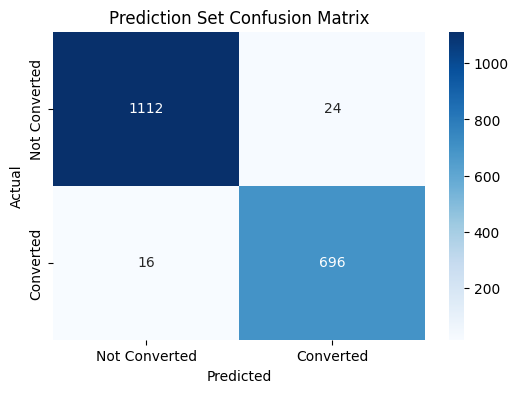


Predictions saved to 'predictions_with_analysis.csv'

Feature Importance:
                                  Feature  Importance
7                        Engagement_Score         889
5                                    Tags         661
2                           Last_Activity         385
3                          Specialization         372
8                      Lead_Quality_Score         245
1                             Lead_Source         183
4         What_is_your_current_occupation         121
0                             Lead_Origin          79
6  A_free_copy_of_Mastering_The_Interview          65


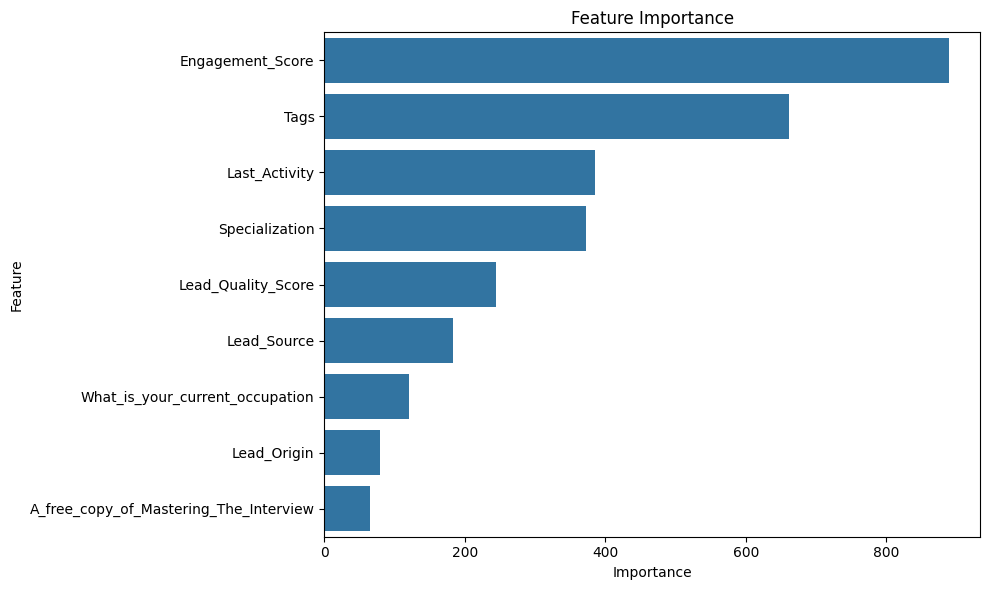

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data and prepare features
X = df.drop(columns=['Converted'])  # Features
y = df['Converted']  # Target variable
X.columns = X.columns.str.replace(' ', '_')

# Create three-way split (train: 60%, test: 20%, predict: 20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.4, 
    random_state=42, 
    stratify=y
)
X_test, X_predict, y_test, y_predict = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    random_state=42, 
    stratify=y_temp
)

# Verify shapes
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Prediction set: {X_predict.shape[0]} samples\n")

# Stratified K-Fold Cross Validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
accuracy_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model = LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1)
    model.fit(X_fold_train, y_fold_train)
    
    y_pred_val = model.predict(X_fold_val)
    accuracy = accuracy_score(y_fold_val, y_pred_val)
    accuracy_scores.append(accuracy)
    print(f"Fold {fold+1} Accuracy: {accuracy:.4f}")

print(f"\nAverage Cross-Validation Accuracy: {np.mean(accuracy_scores):.4f}")

# Train final model
final_model = LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1)
final_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_test = final_model.predict(X_test)
print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

# Analyze prediction set
y_pred_predict = final_model.predict(X_predict)
y_pred_proba = final_model.predict_proba(X_predict)[:, 1]

# Create prediction analysis DataFrame
predictions_df = pd.DataFrame({
    'Index': X_predict.index,
    'Actual': y_predict,
    'Predicted': y_pred_predict,
    'Probability': y_pred_proba
})

# Calculate prediction set accuracy (if actual labels are available)
if not y_predict.isnull().all():
    predict_accuracy = accuracy_score(y_predict, y_pred_predict)
    print("\nPrediction Set Performance:")
    print(f"Accuracy: {predict_accuracy:.4f}")
    print(classification_report(y_predict, y_pred_predict))
    
    # Confusion matrix
    cm = confusion_matrix(y_predict, y_pred_predict)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Converted', 'Converted'],
                yticklabels=['Not Converted', 'Converted'])
    plt.title('Prediction Set Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
else:
    print("\nNo actual labels available for prediction set")

# Save predictions
predictions_df.to_csv('predictions_with_analysis.csv', index=False)
print("\nPredictions saved to 'predictions_with_analysis.csv'")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('standardized_features.csv')# Load data and prepare features
X = df.drop(columns=['Converted'])  # Features
y = df['Converted']  # Target variable
X.columns = X.columns.str.replace(' ', '_')

# Create three-way split (train: 60%, test: 20%, predict: 20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.4, 
    random_state=42, 
    stratify=y
)
X_test, X_predict, y_test, y_predict = train_test_split(
    X_temp, y_temp, 
    test_size=0.5, 
    random_state=42, 
    stratify=y_temp
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Prediction set: {X_predict.shape[0]} samples\n")

# Stratified K-Fold Cross Validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
accuracy_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')
    model.fit(X_fold_train, y_fold_train)
    
    y_pred_val = model.predict(X_fold_val)
    accuracy = accuracy_score(y_fold_val, y_pred_val)
    accuracy_scores.append(accuracy)
    print(f"Fold {fold+1} Accuracy: {accuracy:.4f}")

print(f"\nAverage Cross-Validation Accuracy: {np.mean(accuracy_scores):.4f}")

# Train final model
final_model = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')
final_model.fit(X_train, y_train)

# Evaluate on test set
y_pred_test = final_model.predict(X_test)
print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

# Analyze prediction set
y_pred_predict = final_model.predict(X_predict)
y_pred_proba = final_model.predict_proba(X_predict)[:, 1]

predictions_df = pd.DataFrame({
    'Index': X_predict.index,
    'Actual': y_predict,
    'Predicted': y_pred_predict,
    'Probability': y_pred_proba
})

# Evaluate prediction set if labels are available
if not y_predict.isnull().all():
    predict_accuracy = accuracy_score(y_predict, y_pred_predict)
    print("\nPrediction Set Performance:")
    print(f"Accuracy: {predict_accuracy:.4f}")
    print(classification_report(y_predict, y_pred_predict))

    cm = confusion_matrix(y_predict, y_pred_predict)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Converted', 'Converted'],
                yticklabels=['Not Converted', 'Converted'])
    plt.title('Prediction Set Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
else:
    print("\nNo actual labels available for prediction set")

# Save predictions
predictions_df.to_csv('predictions_with_analysis.csv', index=False)
print("\nPredictions saved to 'predictions_with_analysis.csv'")

# Feature importance for Logistic Regression (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(final_model.coef_[0])
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
